In [33]:
from sklearn import metrics
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import sem
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [34]:
def sum_of_lower_upper(mat):
    r = len(mat)
    c = len(mat[0])
    diag = np.trace(mat)
    lower_sum = 0
    upper_sum = 0
    over_sum = 0
    under_sum = 0

    for i in range(r):
        for j in range(c):
            if (i<j):
                upper_sum += mat[i][j]

    for i in range(r):
        for j in range(c):
            if (j<i):
                lower_sum += mat[i][j]
    
    for i in range(r):
        for j in range(c):
            if (i+j>=3):
                over_sum += mat[i][j]
            else:
                under_sum += mat[i][j]

    return (upper_sum, lower_sum, diag, over_sum, under_sum)

def shift_list(lst, n):
    return lst[n:] + lst[:n]

In [35]:
def produce(Season, df1, df2, df3, df4, df5, df6):
    Season.rename(columns = {'Date_x':'Date'}, inplace = True)
    for df in [df1, df2, df3, df4, df5, df6]:
        df.rename(columns = {'Date_x':'Date'}, inplace = True)
        try:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
        except KeyError:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
            df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
            df.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)


    DF = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
    DF = DF.dropna(subset=['BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A'])
    
    DF = DF[ DF['HM'] != 0] 
    DF = DF[ DF['HM'] != 1] 
    DF = DF[ DF['HM'] != 2] 
    DF = DF[ DF['HM'] != 3]
    cut = int(DF.shape[0])

    subset = DF[['Date', 'HTeam', 'ATeam']].copy()
    DF = DF[[ 'HxG', 'HM', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result']]

    try:
        Season = Season[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    except KeyError:
        Season = Season[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
        Season.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
        Season.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
        
    Season = Season.iloc[30:]
    Season_Information = Season[['Date', 'HTeam', 'ATeam', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    
    DF = pd.concat([DF, Season], ignore_index=True)

    return DF, cut, subset, Season_Information

def Data_cleaning(DF, cut):

    try:
        DF['HxG'] = DF['HxG'].div(DF['HM'])
        DF['HG'] = DF['HG'].div(DF['HM'])
        DF['HGA'] = DF['HGA'].div(DF['HM'])
        DF['HxGA'] = DF['HxGA'].div(DF['HM'])
        DF['AxG'] = DF['AxG'].div(DF['AM'])
        DF['AG'] = DF['AG'].div(DF['AM'])
        DF['AxGA'] = DF['AxG'].div(DF['AM'])
        DF['AGA'] = DF['AGA'].div(DF['AM'])
    except ZeroDivisionError:
        DF['HxG'] = 0
        DF['HG'] = 0
        DF['HGA'] = 0
        DF['HxGA'] = 0
        DF['AxG'] = 0
        DF['AG'] = 0
        DF['AxGA'] = 0
        DF['AGA'] = 0

    DF = DF.reset_index()

    Goals = []
    GoalsSeason = []
    
    for i, x in DF.iloc[:cut].iterrows():
        a=x['Result'].split('\'')
        Goals.append((a[1], a[3]))
    
    for i, x in DF.iloc[cut:].iterrows():
        a=x['Result'].split('\'')
        GoalsSeason.append((a[1], a[3]))

    DF = DF[['HM', 'HxG', 'HxGA', 'HDC', 'HODC', 'HPTS/M', 'AM', 'AxG', 'AxGA', 'ADC', 'AODC', 'APTS/M', 'APPDA', 'AOPPDA', 'HPPDA', 'HOPPDA', 'BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A']]


    DF['PTSDIF/M']=DF['HPTS/M']-DF['APTS/M']
    DF['M']=(DF['HM']+DF['AM'])/2
    

    DF=np.array(DF)
    DF[np.isnan(DF)] = 0.0

    DFnorm = preprocessing.normalize(DF[:, 0:16], axis=0)
    DF = np.concatenate((DFnorm, DF[:, 16:21]), axis=1)
    return DF, Goals

def predict_season(DF, cut, Goals):
    Season = DF[cut:]
    DF = DF[:cut]
    X_train = np.concatenate((DF[:, 1:6], DF[:, 7:16]), axis=1)
    
    y_train1 = []
    y_train2 = []
    for i, k in enumerate(Goals):
            y_train1.append(int(k[0]))
            y_train2.append(int(k[1]))
    
    reg1 = LinearRegression().fit(X_train, y_train1)
    reg2 = LinearRegression().fit(X_train, y_train2)
    return y_train1, y_train2, reg1, reg2, Season

In [36]:
def produce_form(SeasonForm, df1, df2, df3, df4, df5, df6):
    for df in [df1, df2, df3, df4, df5, df6]:
        try:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
        except KeyError:
            df = df[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
            df.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
            df.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
            
        
    DF = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
    merged = pd.merge(subset, DF, on=['Date', 'HTeam', 'ATeam'], how='left')

    # resulting dataframe will have columns of B where the triplet of A['a', 'b', 'c'] exists in B
    DF = merged[DF.columns]
    DF = DF[[ 'HxG', 'HM', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result']]
    cutForm = DF.shape[0]
    print(cutForm)
    
    try:
        SeasonForm = SeasonForm[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'BbAv>2.5', 'BbAv<2.5']]
    except KeyError:
        SeasonForm = SeasonForm[['Date', 'HxG', 'HM', 'HTeam', 'ATeam', 'HG', 'HGA', 'HxGA', 'HDC', 'HODC', 'HPPDA', 'HOPPDA', 'HPTS/M', 'AM', 'AG', 'AGA', 'AxG', 'AxGA', 'ADC', 'AODC', 'APPDA', 'AOPPDA', 'APTS/M', 'Result', 'B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5']]
        SeasonForm.rename(columns = {'B365<2.5':'BbAv<2.5'}, inplace = True)
        SeasonForm.rename(columns = {'B365>2.5':'BbAv>2.5'}, inplace = True)
        
    SeasonForm = SeasonForm.iloc[30:]
    
    DF = pd.concat([DF, SeasonForm], ignore_index=True)
    return DF, cutForm

def Data_cleaning_form(DF, cutForm):



    try:
        DF['HxG'] = DF['HxG'].div(DF['HM'])
        DF['HG'] = DF['HG'].div(DF['HM'])
        DF['HGA'] = DF['HGA'].div(DF['HM'])
        DF['HxGA'] = DF['HxGA'].div(DF['HM'])
        DF['AxG'] = DF['AxG'].div(DF['AM'])
        DF['AG'] = DF['AG'].div(DF['AM'])
        DF['AxGA'] = DF['AxG'].div(DF['AM'])
        DF['AGA'] = DF['AGA'].div(DF['AM'])
    except ZeroDivisionError:
        DF['HxG'] = 0
        DF['HG'] = 0
        DF['HGA'] = 0
        DF['HxGA'] = 0
        DF['AxG'] = 0
        DF['AG'] = 0
        DF['AxGA'] = 0
        DF['AGA'] = 0

    DF = DF.reset_index()

    Goals = []
    GoalsSeason = []
    
    for i, x in DF.iloc[:cutForm].iterrows():
        try:
            a = str(x['Result']).split('\'')
            Goals.append((a[1], a[3]))
        except IndexError:
            print(a)
    
    for i, x in DF.iloc[cutForm:].iterrows():
        try: 
            a = str(x['Result']).split('\'')
            GoalsSeason.append((a[1], a[3]))
        except IndexError:
            print(a)

    DF = DF[['HM', 'HxG', 'HxGA', 'HDC', 'HODC', 'HPTS/M', 'AM', 'AxG', 'AxGA', 'ADC', 'AODC', 'APTS/M', 'APPDA', 'AOPPDA', 'HPPDA', 'HOPPDA', 'BbAv>2.5', 'BbAv<2.5', 'B365H', 'B365D', 'B365A']]
    

    DF['PTSDIF/M']=DF['HPTS/M']-DF['APTS/M']
    DF['M']=(DF['HM']+DF['AM'])/2
    
    DF = DF.reset_index(drop=True)

    DF=np.array(DF)
    DF[np.isnan(DF)] = 0.0
    
    DFnorm = preprocessing.normalize(DF[:, 0:16], axis=0)
    DF = np.concatenate((DFnorm, DF[:, 16:21]), axis=1)
    return DF, Goals, GoalsSeason

def predict_season_form(DF, cutForm, Goals):
    SeasonForm = DF[cutForm:]
    DF = DF[:cutForm]

    X_train = np.concatenate((DF[:, 1:6], DF[:, 7:16]), axis=1)

    y_train1 = []
    y_train2 = []
    for i, k in enumerate(Goals):
            y_train1.append(int(k[0]))
            y_train2.append(int(k[1]))

    regForm1 = LinearRegression().fit(X_train, y_train1)
    regForm2 = LinearRegression().fit(X_train, y_train2)
    return y_train1, y_train2, regForm1, regForm2, SeasonForm

In [37]:
def Results(GoalsSeason, Season, SeasonForm):
    OVER = []
    UNDER = []
    HOME = []
    DRAW = []
    AWAY = []
    H_Goal_Res_list = []
    A_Goal_Res_list = []
    for i, x in enumerate(GoalsSeason):
        H_Goal_Res_list.append(int((GoalsSeason[i])[0]))
        A_Goal_Res_list.append(int((GoalsSeason[i])[1]))
        if int((GoalsSeason[i])[0])+int((GoalsSeason[i])[1])>=3:
            OVER.append(1)
            UNDER.append(0)
        else:
            OVER.append(0)
            UNDER.append(1)

        if int((GoalsSeason[i])[0])>int((GoalsSeason[i])[1]):
            HOME.append(1)
            DRAW.append(0)
            AWAY.append(0)
        if int((GoalsSeason[i])[0])==int((GoalsSeason[i])[1]):
            HOME.append(0)
            DRAW.append(1)
            AWAY.append(0)
        if int((GoalsSeason[i])[0])<int((GoalsSeason[i])[1]):
            HOME.append(0)
            DRAW.append(0)
            AWAY.append(1)

    #y_test1 = []
    #y_test2 = []
    #for i, k in enumerate(GoalsSeason):
    #    y_train1.append(int(k[0]))
    #    y_train2.append(int(k[1]))

    actual_results = (sum(OVER), sum(UNDER), sum(HOME), sum(DRAW), sum(AWAY))
    X_test = np.concatenate((SeasonForm[:, 1:6], SeasonForm[:, 7:16]), axis=1)
    X_testO = Season[:, 16]
    X_testU = Season[:, 17]
    X_testH = Season[:, 18]
    X_testD = Season[:, 19]
    X_testA = Season[:, 20]
    return OVER, UNDER, HOME, DRAW, AWAY, X_test, X_testO, X_testU, X_testH, X_testD, X_testA, actual_results, H_Goal_Res_list, A_Goal_Res_list

In [38]:
def bet_season(LamdaHomeFinal, LamdaAwayFinal, SeasonInformation, bank):
    k = range(12)
    PH = np.zeros((len(k), 1))
    PA = np.zeros((1, len(k)))

    Away = []
    Home = [] 
    Draw = []
    Over = []
    Under = []
    Hpred = []
    Apred = []
    Dpred = []
    Opred = []
    Upred = []
    H_Goal_Ex_list = []
    A_Goal_Ex_list = []
    
    for j, l in enumerate(LamdaHomeFinal):
        H_Goal_Ex = 0
        A_Goal_Ex = 0
        for i in k:
            PH[i, 0] = (math.exp(-l)*l**k[i]) /math.factorial(k[i])
            PA[0, i] = (math.exp(-LamdaAwayFinal[j])*LamdaAwayFinal[j]**k[i]) /math.factorial(k[i])
            H_Goal_Ex += PH[i, 0]*i
            A_Goal_Ex += PA[0, i]*i
        
        H_Goal_Ex_list.append(H_Goal_Ex)
        A_Goal_Ex_list.append(A_Goal_Ex)
            
        Pscore = np.matmul(PH, PA) 
        df = pd.DataFrame(Pscore, columns = ['0','1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
        a, b, c, d, e = sum_of_lower_upper(Pscore)
        Away.append(a)
        Home.append(b)
        Draw.append(c)
        Over.append(d)
        Under.append(e)

    y_pred = []
    y_predU = []
    y_predH = []
    y_predA = []
    y_predD = []
    Over_Info = []
    Under_Info =[] 
    Home_Info = []
    Draw_Info =[]
    Away_Info = []
    for i, y in enumerate(Home):
        if (0.85>=y>=0.6) and (y-1/X_testH[i]>=0.07):
            y_predH.append(1)
            Hpred.append(y)
        else:
            y_predH.append(0)

        if (0.75>=Away[i]>=0.5) and (Away[i]-1/X_testA[i]>=0.07):
            y_predA.append(1)
            Apred.append(Away[i])
        else:
            y_predA.append(0)

        if (Draw[i]-1/X_testD[i]>=1):
            y_predD.append(1)
            Dpred.append(Draw[i])
        else:
            y_predD.append(0)

        if (0.75>=Over[i]>=0.5) and (Over[i]-1/X_testO[i]>=0.07):
            y_pred.append(1)
            Opred.append(Over[i])
        else:
            y_pred.append(0)

        if (0.7>=Under[i]>=0.5) and (Under[i]-1/X_testU[i]>=0.07):
            y_predU.append(1)
            Upred.append(Under[i])
        else:
            y_predU.append(0)




    y_pred = np.array(y_pred, dtype=bool)
    y_pred = y_pred.astype(int)

    y_all= []
    y_allU = []
    y_allH = []
    y_allD = []
    y_allA = []
    y_allOU = []
    y_allHDA = []
    Bet = []
    BetU = []
    BetH = []
    BetA = []
    BetD = []
    BetOU = []
    BetHDA = []
    bankO = []
    bankU = []
    bankH = []
    bankA = []
    bankD = []
    bankOU = []
    bankHDA = []
    Isozugio = []
    IsozugioU = []
    IsozugioH = []
    IsozugioD = []
    IsozugioA = []
    Perc = []
    PercU = []
    PercH = []
    PercD = []
    PercA = []
    sumBet = []
    sumBetU = []
    sumBetH = []
    sumBetA = []
    sumBetD = []
    sumKer = []
    sumKerU = []
    sumKerH = []
    sumKerD = []
    sumKerA = []
    Net_gainO = []
    Net_gainU =[]
    Net_gainH =[]
    Net_gainD =[]
    Net_gainA =[]
    Net_gainOU = []
    Net_gainHDA = []
    ROI_O = []
    ROI_U = []
    ROI_H = []
    ROI_D = [] 
    ROI_A = []
    ROI_OU = []
    ROI_HDA = []
    Pont = 5
    bankOU.append(bank)
    bankHDA.append(bank)
    bankO.append(bank)
    bankU.append(bank)
    bankH.append(bank)
    bankD.append(bank)
    bankA.append(bank) 
    
    #Season Summary, lists have (Over, Under, Home, Draw, Away)
    model_pred = [0, 0, 0, 0, 0]
    bookmaker_pred = [0, 0, 0, 0, 0]
    
    k = 0
    for s in (Over, Under, Home, Draw, Away):
        model_pred[k] += sum(s)
        k += 1
        
    k = 0
    for s in (X_testO, X_testU, X_testH, X_testD, X_testU):
        bookmaker_pred[k]+= sum(1/s)
        k+=1
            
    for i, y in enumerate(OVER):
        
        
        
        
        lineBet     = []
        lineBetU = []
        lineBetH = []
        lineBetD = []
        lineBetA = []
        linesumKer = []
        linesumKerU = []
        linesumKerH = []
        linesumKerD = []
        linesumKerA = []



        #Bet_over = min(abs(Pont*10*(Over[i]-1/X_testO[i])), 15)
        #Bet_under = min(abs(Pont*10*(Under[i]-1/X_testU[i])), 15)
        #Bet_home = min(abs(Pont*10*(Home[i]-1/X_testH[i])), 15)
        #Bet_draw = min(abs(Pont*10*(Draw[i]-1/X_testD[i])), 15)
        #Bet_away = min(abs(Pont*10*(Away[i]-1/X_testA[i])), 15)
        Bet_over =  max(0, bank*(Over[i]- (1-Over[i])/(X_testO[i]-1)))
        Bet_under = max(0, bank*(Under[i]- (1-Under[i])/(X_testU[i]-1)))
        Bet_home =  max(0, bank*(Home[i]- (1-Home[i])/(X_testH[i]-1)))
        Bet_draw =  max(0, bank*(Draw[i]- (1-Draw[i])/(X_testD[i]-1)))
        Bet_away =  max(0, bank*(Away[i]- (1-Away[i])/(X_testA[i]-1)))


        Bet.append(y_pred[i]*Bet_over)
        BetU.append(y_predU[i]*Bet_under)
        BetH.append(y_predH[i]*Bet_home)
        BetD.append(y_predD[i]*Bet_draw)
        BetA.append(y_predA[i]*Bet_away)
        BetOU.append(y_pred[i]*Bet_over + y_predU[i]*Bet_under)
        BetHDA.append(y_predH[i]*Bet_home + y_predD[i]*Bet_draw + y_predA[i]*Bet_away)
        
        y_all.append(y_pred[i]*Bet_over*y*(X_testO[i]))
        y_allU.append(y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        y_allH.append(y_predH[i]*Bet_home*HOME[i]*(X_testH[i]))
        y_allD.append(y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]))
        y_allA.append(y_predA[i]*Bet_away*AWAY[i]*(X_testA[i]))
        y_allOU.append(y_pred[i]*Bet_over*y*(X_testO[i]) + y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        y_allHDA.append(y_predH[i]*Bet_home*HOME[i]*(X_testH[i]) + y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]) + y_pred[i]*Bet_over*y*(X_testO[i]) + y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        
        bankO.append(bankO[i] -y_pred[i]*Bet_over +y_pred[i]*Bet_over*y*(X_testO[i]))
        bankU.append(bankU[i] -y_predU[i]*Bet_under +y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        bankH.append(bankH[i] -y_predH[i]*Bet_home +y_predH[i]*Bet_home*HOME[i]*(X_testH[i]))
        bankD.append(bankD[i] -y_predD[i]*Bet_draw +y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]))
        bankA.append(bankA[i] -y_predA[i]*Bet_away +y_predA[i]*Bet_away*AWAY[i]*(X_testA[i]))
        bankOU.append(bankOU[i] -y_pred[i]*Bet_over +y_pred[i]*Bet_over*y*(X_testO[i]) -y_predU[i]*Bet_under +y_predU[i]*Bet_under*UNDER[i]*(X_testU[i]))
        bankHDA.append(bankHDA[i] -y_predH[i]*Bet_home +y_predH[i]*Bet_home*HOME[i]*(X_testH[i]) -y_predD[i]*Bet_draw +y_predD[i]*Bet_draw*DRAW[i]*(X_testD[i]) -y_predA[i]*Bet_away +y_predA[i]*Bet_away*AWAY[i]*(X_testA[i]))

        sumBet.append(sum(Bet))
        sumBetU.append(sum(BetU))
        sumBetH.append(sum(BetH))
        sumBetA.append(sum(BetA))
        sumBetD.append(sum(BetD))
        
        if y_pred[i] != 0:
            Net_gainO.append(bankO[-1] - bank)
            Net_gainOU.append(bankOU[-1] - bank)
            Over_Info.append(SeasonInformation.iloc[i])
            
            
        if y_predU[i] != 0:
            Net_gainU.append(bankU[-1] - bank)
            Net_gainOU.append(bankOU[-1] - bank)
            Under_Info.append(SeasonInformation.iloc[i])
        
        if y_predH[i] != 0:
            Net_gainHDA.append(bankHDA[-1] - bank)
            Net_gainH.append(bankH[-1] - bank)
            Home_Info.append(SeasonInformation.iloc[i])
        
        if y_predD[i] != 0:
            Net_gainHDA.append(bankHDA[-1] - bank)
            Net_gainD.append(bankD[-1] - bank)
            Draw_Info.append(SeasonInformation.iloc[i])
        
        if y_predA[i] != 0:
            Net_gainHDA.append(bankHDA[-1] - bank)
            Net_gainA.append(bankA[-1] - bank)
            Away_Info.append(SeasonInformation.iloc[i])
        
        if y_pred[i] != 0:
            ROI_O.append(Net_gainO[-1]*100/bank)
            ROI_OU.append(Net_gainOU[-1]*100/bank)
        
        if y_predU[i] != 0:
            ROI_U.append(Net_gainU[-1]*100/bank)
            ROI_OU.append(Net_gainOU[-1]*100/bank)
        
        if y_predH[i] != 0:
            ROI_H.append(Net_gainH[-1]*100/bank)
            ROI_HDA.append(Net_gainHDA[-1]*100/bank)
        
        if y_predD[i] != 0:
            ROI_D.append(Net_gainD[-1]*100/bank)
            ROI_HDA.append(Net_gainHDA[-1]*100/bank)
        
        if y_predA[i] != 0: 
            ROI_A.append(Net_gainA[-1]*100/bank)
            ROI_HDA.append(Net_gainHDA[-1]*100/bank)
        
        Isozugio.append(sum(y_all)- sum(Bet))
        IsozugioU.append(sum(y_allU)- sum(BetU))
        IsozugioH.append(sum(y_allH)- sum(BetH))
        IsozugioD.append(sum(y_allD)- sum(BetD))
        IsozugioA.append(sum(y_allA)- sum(BetA))
        Perc.append(100*(sum(y_all)- sum(Bet))/sum(Bet))
        PercU.append(100*(sum(y_allU)- sum(BetU))/sum(BetU))
        PercH.append(100*(sum(y_allH)- sum(BetH))/sum(BetH))
        PercD.append(100*(sum(y_allD)- sum(BetD))/sum(BetD))
        PercA.append(100*(sum(y_allA)- sum(BetA))/sum(BetA))
        sumKer.append(sum(y_all))
        sumKerU.append(sum(y_allU))
        sumKerH.append(sum(y_allH))
        sumKerD.append(sum(y_allD))
        sumKerA.append(sum(y_allA))

    

    Over_bet = (sum(y_pred), len(y_pred), sum(Bet), Perc[len(Perc)-1], Isozugio[len(Isozugio)-1], ROI_O, Net_gainO, Over_Info, ROI_OU, Net_gainOU)
    Under_bet = (sum(y_predU), len(y_predU), sum(BetU), PercU[len(PercU)-1], IsozugioU[len(IsozugioU)-1], ROI_U, Net_gainU, Under_Info, ROI_OU, Net_gainOU)
    Draw_bet = (sum(y_predD), len(y_predD), sum(BetD), PercD[len(PercD)-1], IsozugioD[len(IsozugioD)-1], ROI_D, Net_gainD, Draw_Info, ROI_HDA, Net_gainHDA)
    Home_bet = (sum(y_predH), len(y_predH), sum(BetH), PercH[len(PercH)-1], IsozugioH[len(IsozugioH)-1], ROI_H, Net_gainH, Home_Info, ROI_HDA, Net_gainHDA)
    Away_bet = (sum(y_predA), len(y_predA), sum(BetA), PercA[len(PercA)-1], IsozugioA[len(IsozugioA)-1], ROI_A, Net_gainA, Away_Info, ROI_HDA, Net_gainHDA)
    return Over_bet, Under_bet, Home_bet, Draw_bet, Away_bet, model_pred, bookmaker_pred, Over, Under, Home, Draw, Away, H_Goal_Ex_list, A_Goal_Ex_list

In [39]:
df1 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2017.csv')
df2 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2018.csv')
df3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2019.csv')
df4 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2020.csv')
df5 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2021.csv')
df6 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2022.csv')
df7 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Full20xxFiles/Full2023.csv')



df1_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2017Monthly.csv')
df2_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2018Monthly.csv')
df3_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2019Monthly.csv')
df4_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2020Monthly.csv')
df5_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2021Monthly.csv')
df6_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2022Monthly.csv')
df7_form = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xxMonthlyFiles/Epl2023Monthly.csv')

df1_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2017_3Months.csv')
df2_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2018_3Months.csv')
df3_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2019_3Months.csv')
df4_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2020_3Months.csv')
df5_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2021_3Months.csv')
df6_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2022_3Months.csv')
df7_form3 = pd.read_csv('~/Documents/EnglishPremierLeaguePredictor/GatheredData/Epl20xx_3Months/Epl2023_3Months.csv')

lst = [df1, df2, df3, df4, df5, df6, df7]
lst_form = [df1_form, df2_form, df3_form, df4_form, df5_form, df6_form, df7_form]
lst_form3 = [df1_form3, df2_form3, df3_form3, df4_form3, df5_form3, df6_form3, df7_form3]

Over_bet_list  = []
Under_bet_list = []
Home_bet_list = []
Draw_bet_list = []
Away_bet_list = []

Home_Info_list = []
Away_Info_list = []
Draw_Info_list = []
Over_Info_list = []
Under_Info_list = []

ACTUAL_RESULTS = []
MODEL_PRED = []
BOOKMAKER_PRED = []

for i in range(len(lst)):
    h = shift_list(lst, i)
    print(h[:-1])
    d = shift_list(lst_form, i)
    g = shift_list(lst_form3, i)

    DF, cut, subset, SeasonInformation = produce(*h)
    DF, Goals = Data_cleaning(DF, cut)
    y_train1, y_train2, reg1, reg2, Season = predict_season(DF, cut, Goals)
    
    DF, cutForm = produce_form(*d)
    DF, Goals, GoalsSeason = Data_cleaning_form(DF, cutForm)
    y_train1, y_train2, regForm1, regForm2, SeasonForm = predict_season_form(DF, cutForm, Goals)
    
    #DF, cutForm = produce_form(*g)
    #DF, Goals, GoalsSeason = Data_cleaning_form(DF, cutForm)
    #y_train1, y_train2, regForm1_3, regForm2_3, SeasonForm = predict_season_form(DF, cutForm, Goals)
    
    OVER, UNDER, HOME, DRAW, AWAY, X_test, X_testO, X_testU, X_testH, X_testD, X_testA, actual_results, H_Goals_Res_list, A_Goals_Res_list = Results(GoalsSeason, Season, SeasonForm)
    ACTUAL_RESULTS.append(actual_results)
    
    LamdaHome= reg1.predict(X_test)
    LamdaAway= reg2.predict(X_test)
    
    LamdaHomeForm= regForm1.predict(X_test)
    LamdaAwayForm= regForm2.predict(X_test)
    
    #LamdaHomeForm3= regForm1_3.predict(X_test)
    #LamdaAwayForm3= regForm2_3.predict(X_test)
    
    LamdaAwayFinal = [(LamdaAway[i] * 0.4 + LamdaAwayForm[i] * 0.6) for i in range(len(LamdaAway))]
    LamdaHomeFinal = [(LamdaHome[i] * 0.4 + LamdaHomeForm[i] * 0.6) for i in range(len(LamdaHome))]
    
    bank = 50
    o, u, h, d, a, model_pred, bookmaker_pred, Over, Under, Home, Draw, Away, H_Goals_Ex_list, A_Goals_Ex_list = bet_season(LamdaHomeFinal, LamdaAwayFinal, SeasonInformation, bank)
    if i==6:
        Final_SeasonInformation = SeasonInformation.copy()
        Season_Over  = Over.copy()
        Season_Under = Under.copy()
        Season_Home = Home.copy()
        Season_Draw = Draw.copy()
        Season_Away = Away.copy()
        
    MODEL_PRED.append(model_pred)
    BOOKMAKER_PRED.append(bookmaker_pred)
    Over_bet_list.append(o)
    Under_bet_list.append(u)
    Home_bet_list.append(h)
    Draw_bet_list.append(d)
    Away_bet_list.append(a)
    
    
for i, y in enumerate([2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    print(y)
    
    print('Under')
    print(f'Predicted {Under_bet_list[i][0]} matches out of the {Under_bet_list[i][1]} for {Under_bet_list[i][2]} euros')
    print(f'Hit {Under_bet_list[i][3]} % per match for {Under_bet_list[i][4]} euros')
    print(f'Hit {Under_bet_list[i][4]} % on the budget of 100 euros')

    print('Over')
    print(f'Predicted {Over_bet_list[i][0]} matches out of the {Over_bet_list[i][1]} for {Over_bet_list[i][2]} euros')
    print(f'Hit {Over_bet_list[i][3]} % per match for {Over_bet_list[i][4]} euros')
    print(f'Hit {Over_bet_list[i][4]} % on the budget of 100 euros')

    print('Home wins')
    print(f'Predicted {Home_bet_list[i][0]} matches out of the {Home_bet_list[i][1]} for {Home_bet_list[i][2]} euros')
    print(f'Hit {Home_bet_list[i][3]} % per match for {Home_bet_list[i][4]} euros')
    print(f'Hit {Home_bet_list[i][4]} % on the budget of 100 euros')

    print('Away wins')
    print(f'Predicted {Away_bet_list[i][0]} matches out of the {Away_bet_list[i][1]} for {Away_bet_list[i][2]} euros')
    print(f'Hit {Away_bet_list[i][3]} % per match for {Away_bet_list[i][4]} euros')
    print(f'Hit {Away_bet_list[i][4]} % on the budget of 100 euros')

    print('Draws')
    print(f'Predicted {Draw_bet_list[i][0]} matches out of the {Draw_bet_list[i][1]} for {Draw_bet_list[i][2]} euros')
    print(f'Hit {Draw_bet_list[i][3]} % per match for {Draw_bet_list[i][4]} euros')
    print(f'Hit {Draw_bet_list[i][4]} % on the budget of 100 euros')   
    
    print('Probability Evaluation')
    print('Actual')
    print(ACTUAL_RESULTS[i])
    print('Bookmaker')
    print(BOOKMAKER_PRED[i])
    print('Model')
    print(MODEL_PRED[i])
    
    print('\n')

[     Unnamed: 0.1  Unnamed: 0      Date_x          HomeTeam         AwayTeam  \
0               0           0  11/08/2017           Arsenal        Leicester   
1               1           1  12/08/2017           Watford        Liverpool   
2               2           2  12/08/2017           Chelsea          Burnley   
3               3           3  12/08/2017    Crystal Palace     Huddersfield   
4               4           4  12/08/2017           Everton            Stoke   
..            ...         ...         ...               ...              ...   
375           375         375  13/05/2018  Newcastle United          Chelsea   
376           376         376  13/05/2018       Southampton  Manchester City   
377           377         377  13/05/2018           Swansea            Stoke   
378           378         378  13/05/2018         Tottenham        Leicester   
379           379         379  13/05/2018          West Ham          Everton   

           Result             HTeam  H

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

[     Unnamed: 0.1  Unnamed: 0        Date           HomeTeam  \
0               0           0  10/08/2018  Manchester United   
1               1           1  11/08/2018   Newcastle United   
2               2           2  11/08/2018        Bournemouth   
3               3           3  11/08/2018             Fulham   
4               4           4  11/08/2018       Huddersfield   
..            ...         ...         ...                ...   
375           375         375  12/05/2019          Liverpool   
376           376         376  12/05/2019  Manchester United   
377           377         377  12/05/2019        Southampton   
378           378         378  12/05/2019          Tottenham   
379           379         379  12/05/2019            Watford   

                    AwayTeam        Result              HTeam  HM  HG  HGA  \
0                  Leicester  ['2 ', ' 1']  Manchester United   0   0    0   
1                  Tottenham  ['1 ', ' 2']   Newcastle United   0   0    0

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

[     Unnamed: 0.1  Unnamed: 0        Date          HomeTeam  \
0               0           0  09/08/2019         Liverpool   
1               1           1  10/08/2019          West Ham   
2               2           2  10/08/2019       Bournemouth   
3               3           3  10/08/2019           Burnley   
4               4           4  10/08/2019    Crystal Palace   
..            ...         ...         ...               ...   
375           375         375  26/07/2020         Leicester   
376           376         376  26/07/2020   Manchester City   
377           377         377  26/07/2020  Newcastle United   
378           378         378  26/07/2020       Southampton   
379           379         379  26/07/2020          West Ham   

              AwayTeam        Result             HTeam  HM  HG  HGA  ...  \
0              Norwich  ['4 ', ' 1']         Liverpool   0   0    0  ...   
1      Manchester City  ['0 ', ' 5']          West Ham   0   0    0  ...   
2     Sheffiel

/tmp/ipykernel_236889/3275553892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

[     Unnamed: 0.1  Unnamed: 0        Date                 HomeTeam  \
0               0           0  12/09/2020                   Fulham   
1               1           1  12/09/2020           Crystal Palace   
2               2           2  12/09/2020                Liverpool   
3               3           3  12/09/2020                 West Ham   
4               4           4  13/09/2020     West Bromwich Albion   
..            ...         ...         ...                      ...   
375           375         375  23/05/2021                Liverpool   
376           376         376  23/05/2021          Manchester City   
377           377         377  23/05/2021         Sheffield United   
378           378         378  23/05/2021                 West Ham   
379           379         379  23/05/2021  Wolverhampton Wanderers   

              AwayTeam        Result                    HTeam  HM  HG  HGA  \
0              Arsenal  ['0 ', ' 3']                   Fulham   0   0    0   
1 

/tmp/ipykernel_236889/4248093238.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

[     Unnamed: 0.1  Unnamed: 0        Date           HomeTeam  \
0               0           0  13/08/2021          Brentford   
1               1           1  14/08/2021  Manchester United   
2               2           2  14/08/2021            Burnley   
3               3           3  14/08/2021            Chelsea   
4               4           4  14/08/2021            Everton   
..            ...         ...         ...                ...   
375           375         375  22/05/2022     Crystal Palace   
376           376         376  22/05/2022          Leicester   
377           377         377  22/05/2022          Liverpool   
378           378         378  22/05/2022    Manchester City   
379           379         379  22/05/2022            Norwich   

                    AwayTeam        Result              HTeam  HM  HG  HGA  \
0                    Arsenal  ['2 ', ' 0']          Brentford   0   0    0   
1                      Leeds  ['5 ', ' 1']  Manchester United   0   0    0

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

[     Unnamed: 0        Date           HomeTeam                 AwayTeam  \
0             0  05/08/2022     Crystal Palace                  Arsenal   
1             1  06/08/2022             Fulham                Liverpool   
2             2  06/08/2022        Bournemouth              Aston Villa   
3             3  06/08/2022              Leeds  Wolverhampton Wanderers   
4             4  06/08/2022   Newcastle United        Nottingham Forest   
..          ...         ...                ...                      ...   
375         375  28/05/2023            Everton              Bournemouth   
376         376  28/05/2023              Leeds                Tottenham   
377         377  28/05/2023          Leicester                 West Ham   
378         378  28/05/2023  Manchester United                   Fulham   
379         379  28/05/2023        Southampton                Liverpool   

           Result  B365H  B365D  B365A  BbAv>2.5  BbAv<2.5  ...  AG  AGA  \
0    ['0 ', ' 2']   4.

/tmp/ipykernel_236889/3275553892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/3275553892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

[    Unnamed: 0        Date                 HomeTeam           AwayTeam  \
0            0  11/08/2023                  Burnley    Manchester City   
1            1  12/08/2023                  Arsenal  Nottingham Forest   
2            2  12/08/2023              Bournemouth           West Ham   
3            3  12/08/2023                 Brighton              Luton   
4            4  12/08/2023                  Everton             Fulham   
..         ...         ...                      ...                ...   
64          64  30/09/2023                 West Ham   Sheffield United   
65          65  30/09/2023  Wolverhampton Wanderers    Manchester City   
66          66  30/09/2023                Tottenham          Liverpool   
67          67  01/10/2023        Nottingham Forest          Brentford   
68          68  02/10/2023                   Fulham            Chelsea   

          Result  B365H  B365D  B365A  BbAv>2.5  BbAv<2.5  ...  AG  AGA  APTS  \
0   ['0 ', ' 3']   8.00   5.5

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_236889/4248093238.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [40]:
Final_SeasonInformation['Over'] = OVER
Final_SeasonInformation['Predicted Over'] = Season_Over
Final_SeasonInformation['Under'] = UNDER
Final_SeasonInformation['Predicted Under'] = Season_Under
Final_SeasonInformation['Home wins'] = HOME
Final_SeasonInformation['Predicted Home wins'] = Season_Home
Final_SeasonInformation['Draws'] = DRAW
Final_SeasonInformation['Predicted Draws'] = Season_Draw
Final_SeasonInformation['Away wins'] = AWAY
Final_SeasonInformation['Predicted Away wins'] = Season_Away
Final_SeasonInformation['Home Goals'] = H_Goals_Res_list
Final_SeasonInformation['Away Goals'] = A_Goals_Res_list
Final_SeasonInformation['Predicted Home Goals'] = H_Goals_Ex_list
Final_SeasonInformation['Predicted Away Goals'] = A_Goals_Ex_list


# Group by unique dates and calculate the sums
Final_SeasonInformation['Date'] = pd.to_datetime(Final_SeasonInformation['Date'], format='%d/%m/%Y')
grouped = Final_SeasonInformation.sort_values(by="Date")
grouped['Date'] = grouped['Date'].dt.strftime('%m/%Y')
grouped = grouped.groupby("Date").agg({"Over": "sum", "Predicted Over": "sum",
                                       "Under": "sum", "Predicted Under": "sum",
                                       "Home wins": "sum", "Predicted Home wins": "sum",
                                       "Draws": "sum", "Predicted Draws": "sum",
                                       "Away wins": "sum", "Predicted Away wins": "sum",
                                       "Home Goals": "mean",  "Predicted Home Goals": "mean",
                                       "Away Goals": "mean", "Predicted Away Goals": "mean"}).reset_index()

display(grouped)
# Calculate the number of matches per date and create a bar plot
matches_per_date = Final_SeasonInformation['Date'].value_counts().reset_index().rename(columns={'index': 'Date', 'Date': 'Matches'})
matches_per_date['Date'] = pd.to_datetime(matches_per_date['Date'], format='%d/%m/%Y')
matches_per_date['Date'] = matches_per_date['Date'].dt.strftime('%m/%Y')
matches_per_date = matches_per_date.sort_values(by="Date")

# Create an interactive line area plot
fig = go.Figure()

# Add traces for Over_results and Predicted_over (you can add more traces as needed)
traces = {}
traces["Over"] = go.Scatter(x=grouped["Date"], y=grouped["Over"], mode='lines+markers', name='Over', marker= dict(color = 'rgb(82, 106, 131)' ), visible=True, line=dict(shape='spline'))
traces["Predicted Over"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Over"], mode='lines+markers', name='Predicted Over', marker= dict(color ='rgb(141,211,199)'), visible=True, line=dict(shape='spline'))
traces["Under"] = go.Scatter(x=grouped["Date"], y=grouped["Under"], mode='lines+markers', name='Under', marker= dict(color = 'rgb(82, 106, 131)' ), visible=False, line=dict(shape='spline'))
traces["Predicted Under"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Under"], mode='lines+markers', name='Predicted Under', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Home wins"] = go.Scatter(x=grouped["Date"], y=grouped["Home wins"], mode='lines+markers', name='Home wins', marker= dict(color = 'rgb(82, 106, 131)' ), visible=False, line=dict(shape='spline'))
traces["Predicted Home wins"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Home wins"], mode='lines+markers', name='Predicted Home wins', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Draws"] = go.Scatter(x=grouped["Date"], y=grouped["Draws"], mode='lines+markers', name='Draws', marker= dict(color = 'rgb(82, 106, 131)' ), visible=False, line=dict(shape='spline'))
traces["Predicted Draws"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Draws"], mode='lines+markers', name='Predicted Draws', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Away wins"] = go.Scatter(x=grouped["Date"], y=grouped["Away wins"], mode='lines+markers', name='Away wins', marker= dict(color = 'rgb(82, 106, 131)' ), visible=False, line=dict(shape='spline'))
traces["Predicted Away wins"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Away wins"], mode='lines+markers', name='Predicted Away wins', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Home Goals"] = go.Scatter(x=grouped["Date"], y=grouped["Home Goals"], mode='lines+markers', name='Home Goals Average', marker= dict(color ='rgb(82, 106, 131)'), visible=False, line=dict(shape='spline'))
traces["Home Predicted Goals"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Home Goals"], mode='lines+markers', name='Predicted Home Goals Average', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Away Goals"] = go.Scatter(x=grouped["Date"], y=grouped["Away Goals"], mode='lines+markers', name='Away Goals Average', marker= dict(color ='rgb(82, 106, 131)'), visible=False, line=dict(shape='spline'))
traces["Away Predicted Goals"] = go.Scatter(x=grouped["Date"], y=grouped["Predicted Away Goals"], mode='lines+markers', name='Predicted Away Goals Average', marker= dict(color ='rgb(141,211,199)'), visible=False, line=dict(shape='spline'))
traces["Matches"] = go.Bar(x=matches_per_date["Date"], y=matches_per_date["Matches"], name='Matches per Month', opacity=0.2, marker=dict(color = 'rgb(160, 122, 45)'), visible=True)

for trace_name, trace_data in traces.items():
    fig.add_trace(trace_data)
    
# Add a dropdown menu for category selection
categories = ["Over", "Under", "Home wins", "Draws", "Away wins", "Home Goals Average", "Away Goals Average"]
category_buttons = []


original_vis = [True, True, False, False, False, False, False, False, False, False, False, False, False, False]

for category in categories:
    category_button = {
        "label": f"<b>{category}</b>",
        "method": "update",
        "args": [
            {"visible": original_vis + [True]},
            {"title": f"Number of <b>{category}</b> | <b>Results vs. Model Prediction</b>"}
        ],
    }
    category_buttons.append(category_button)
    
    original_vis = original_vis[-2:] + original_vis[:-2]

# Update layout and menus
fig.update_layout(
    title="Number of <b>Over</b> | <b>Results vs. Model Prediction</b>",
    xaxis_title="<b>Date</b>",
    yaxis_title="<b>Results vs. Model Prediction</b>",
    xaxis=dict(type='category'),
)

fig.update_layout(
    updatemenus=[
        {
            "buttons": category_buttons,
            "direction": "down",
            "showactive": True,
            "x": 0,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top",
        }
    ]
)

# Show the plot
fig.show()
# Save the interactive figure as an HTML file
fig.write_html('PredictionEval.html')

Date  Over  Predicted Over  Under  Predicted Under  Home wins  \
0  09/2023    23       23.420683     14        13.578803         17   
1  10/2023     0        1.155367      2         0.844632          0   

   Predicted Home wins  Draws  Predicted Draws  Away wins  \
0            17.070516      7         7.299522         13   
1             0.566969      1         0.472078          1   

   Predicted Away wins  Home Goals  Predicted Home Goals  Away Goals  \
0            12.629447    1.648649              1.833171    1.513514   
1             0.960952    0.500000              1.277544    1.500000   

   Predicted Away Goals  
0              1.460751  
1              1.735231

Date         HTeam                 ATeam        Result  B365H  \
35  2017-09-09   Southampton               Watford  ['0 ', ' 2']   1.65   
32  2017-09-09      Brighton  West Bromwich Albion  ['3 ', ' 1']   2.70   
33  2017-09-09       Everton             Tottenham  ['0 ', ' 3']   3.80   
34  2017-09-09     Leicester               Chelsea  ['1 ', ' 2']   4.75   
36  2017-09-09         Stoke     Manchester United  ['2 ', ' 2']   7.50   
..         ...           ...                   ...           ...    ...   
365 2018-05-09     Leicester               Arsenal  ['3 ', ' 1']   3.75   
369 2018-05-10      West Ham     Manchester United  ['0 ', ' 0']   4.75   
370 2018-05-13       Burnley           Bournemouth  ['1 ', ' 2']   2.14   
379 2018-05-13      West Ham               Everton  ['3 ', ' 1']   2.45   
372 2018-05-13  Huddersfield               Arsenal  ['0 ', ' 1']   6.00   

     B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
35    4.00    6.0      1.97      1.85   Over  
32    3.10    3.0      2.60      1.49  Under  
33    3.50    2.1      2.04      1.79  Under  
34    3.90    1.8      1.86      1.96  Under  
36    4.50    1.5      1.88      1.94  Under  
..     ...    ...       ...       ...    ...  
365   3.79    2.0      1.54      2.45  Under  
369   3.79    1.8      1.81      2.01   Over  
370   3.50    3.6      1.86      1.95  Under  
379   3.50    3.0      1.84      1.97   Over  
372   4.33    1.6      1.50      2.55  Under  

[140 rows x 10 columns]

[-2.636455749904343, -17.36917378111906, -41.772287531592575, -43.28391188597572, -61.991021972314044, -45.3594120852012, -29.992451671969064, -31.912663543689106, -54.965058708067666, -52.81414509048175, -36.831482420548895, -26.76962913810098, -54.40796651521512, -62.39464927265712, -80.62608399505963, -90.20570195232094, -128.14530334971099, -103.85927388849682, -134.6816052375371, -123.91117814940858, -113.45847397714562, -94.11124304233124, -82.43015079917126, -49.67206956701718, -58.91033711319051, -50.41120488281838, -66.0326107688796, -81.07476714026951, -83.83185601498053, -81.90112911726234, -83.43062178693849, -82.3518396837706, -123.76777046264706, -110.53719656702602, -126.96464227175434, -124.17494252850072, -147.30982260221012, -144.0781026565877, -183.14632671697893, -175.20009626129047, -161.3414003221064, -142.93861008547032, -81.99668116064662, -86.17848547688054, -77.36540623608465, -64.9222971549686, -39.502469962134825, -76.67264353088848, -91.00342589477276, -86.

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




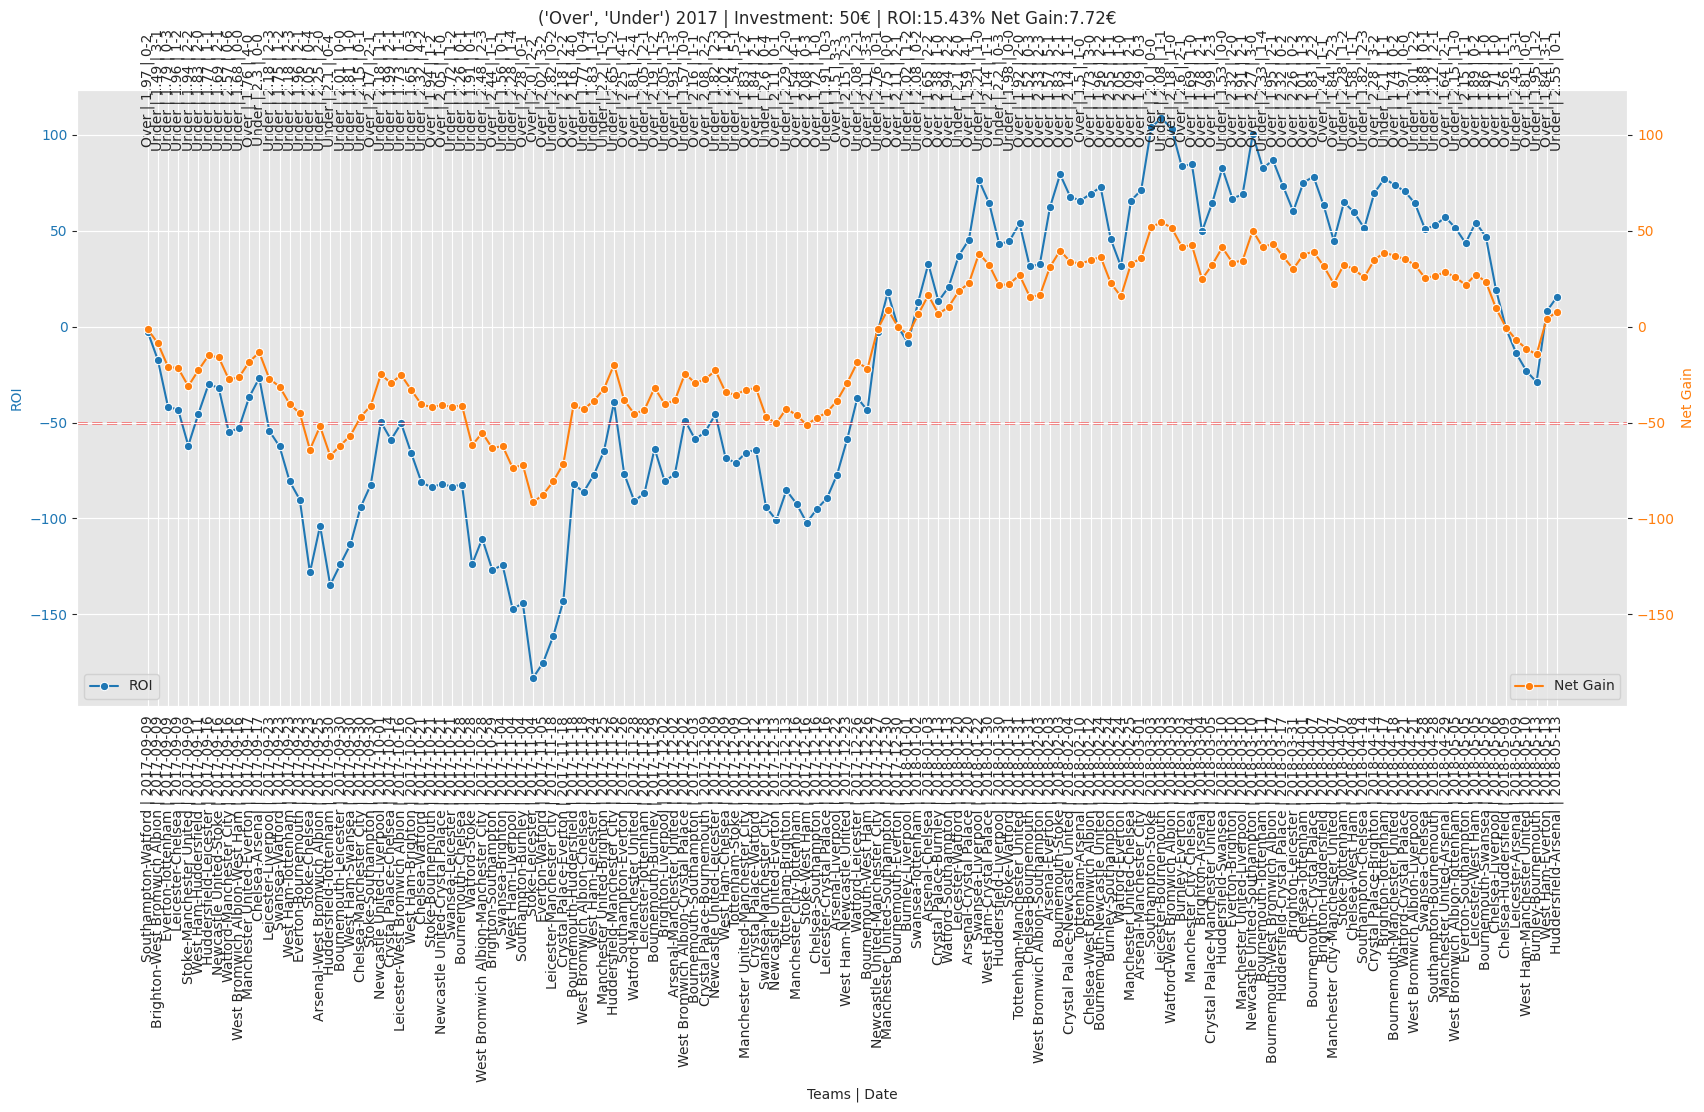

Date                 HTeam                 ATeam        Result  \
35  2017-09-09           Southampton               Watford  ['0 ', ' 2']   
33  2017-09-09               Everton             Tottenham  ['0 ', ' 3']   
38  2017-09-10               Swansea      Newcastle United  ['0 ', ' 1']   
39  2017-09-11              West Ham          Huddersfield  ['2 ', ' 0']   
41  2017-09-16        Crystal Palace           Southampton  ['0 ', ' 1']   
49  2017-09-17     Manchester United               Everton  ['4 ', ' 0']   
50  2017-09-23              West Ham             Tottenham  ['2 ', ' 3']   
57  2017-09-23             Leicester             Liverpool  ['2 ', ' 3']   
66  2017-09-30               Chelsea       Manchester City  ['0 ', ' 1']   
103 2017-11-04           Southampton               Burnley  ['0 ', ' 1']   
107 2017-11-05       Manchester City               Arsenal  ['3 ', ' 1']   
111 2017-11-18           Bournemouth          Huddersfield  ['4 ', ' 0']   
126 2017-11-25             Liverpool               Chelsea  ['1 ', ' 1']   
135 2017-11-29           Bournemouth               Burnley  ['1 ', ' 2']   
146 2017-12-02  West Bromwich Albion        Crystal Palace  ['0 ', ' 0']   
147 2017-12-02               Arsenal     Manchester United  ['1 ', ' 3']   
159 2017-12-10     Manchester United       Manchester City  ['1 ', ' 2']   
157 2017-12-10           Southampton               Arsenal  ['1 ', ' 1']   
168 2017-12-13             Liverpool  West Bromwich Albion  ['0 ', ' 0']   
166 2017-12-13              West Ham               Arsenal  ['0 ', ' 0']   
176 2017-12-16       Manchester City             Tottenham  ['4 ', ' 1']   
180 2017-12-22               Arsenal             Liverpool  ['3 ', ' 3']   
186 2017-12-23               Swansea        Crystal Palace  ['1 ', ' 1']   
203 2017-12-30             Liverpool             Leicester  ['2 ', ' 1']   
208 2017-12-31  West Bromwich Albion               Arsenal  ['1 ', ' 1']   
220 2018-01-13               Chelsea             Leicester  ['0 ', ' 0']   
231 2018-01-20               Arsenal        Crystal Palace  ['4 ', ' 1']   
240 2018-01-30               Swansea               Arsenal  ['3 ', ' 1']   
249 2018-01-31             Tottenham     Manchester United  ['2 ', ' 0']   
243 2018-01-31               Chelsea           Bournemouth  ['0 ', ' 3']   
268 2018-02-11           Southampton             Liverpool  ['0 ', ' 2']   
269 2018-02-12               Chelsea  West Bromwich Albion  ['3 ', ' 0']   
288 2018-03-04       Manchester City               Chelsea  ['1 ', ' 0']   
314 2018-04-07               Everton             Liverpool  ['0 ', ' 0']   
321 2018-04-07       Manchester City     Manchester United  ['2 ', ' 3']   
322 2018-04-08               Arsenal           Southampton  ['3 ', ' 2']   
324 2018-04-14           Southampton               Chelsea  ['2 ', ' 3']   
337 2018-04-19             Leicester           Southampton  ['0 ', ' 0']   
340 2018-04-22               Arsenal              West Ham  ['4 ', ' 1']   
344 2018-04-28             Liverpool                 Stoke  ['0 ', ' 0']   
355 2018-05-05                 Stoke        Crystal Palace  ['1 ', ' 2']   
356 2018-05-05           Bournemouth               Swansea  ['1 ', ' 0']   
357 2018-05-05             Leicester              West Ham  ['0 ', ' 2']   
362 2018-05-06               Arsenal               Burnley  ['5 ', ' 0']   
363 2018-05-06               Chelsea             Liverpool  ['1 ', ' 0']   
365 2018-05-09             Leicester               Arsenal  ['3 ', ' 1']   
372 2018-05-13          Huddersfield               Arsenal  ['0 ', ' 1']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
35    1.65   4.00   6.00      1.97      1.85  Home  
33    3.80   3.50   2.10      2.04      1.79  Away  
38    2.40   3.25   3.30      2.17      1.70  Away  
39    1.95   3.50   4.50      1.99      1.83  Away  
41    3.00   3.30   2.60      2.30      1.62  Away  
49    1.36   5.25  10.00      1.76      2.0

[18.034489007826977, 16.178664395216657, 100.1189481088374, 48.32541090396876, 84.61738975963048, 99.7498411917048, 103.54254723531523, 121.44346393607532, 172.4264487775691, 155.3309619813608, 161.65809325661218, 174.82519813148792, 132.43271580834468, 109.59917539404636, 76.29195232796911, 16.272475208438863, 5.018793281949826, 64.04034631079301, 29.614276248699245, 17.738916843830467, 34.91668376128354, -2.2386345966781107, -29.127415134961325, -23.103662351070653, -32.9186220141965, -50.51796061632061, -43.83864590471052, -53.83996702463686, -59.27778609882223, -13.688340628635174, -2.383573842873986, -0.9975537559615901, 19.15053223518393, 7.854935922052575, -49.20621773545763, -47.360678193503965, -45.08726973043144, -74.40979975875295, -63.541394959602364, -94.50821853337533, -47.28871365095345, -20.90574395392038, -55.58840940302282, -44.47551531379122, -8.723649861281984, -13.836224462738471, -9.804153923335534]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




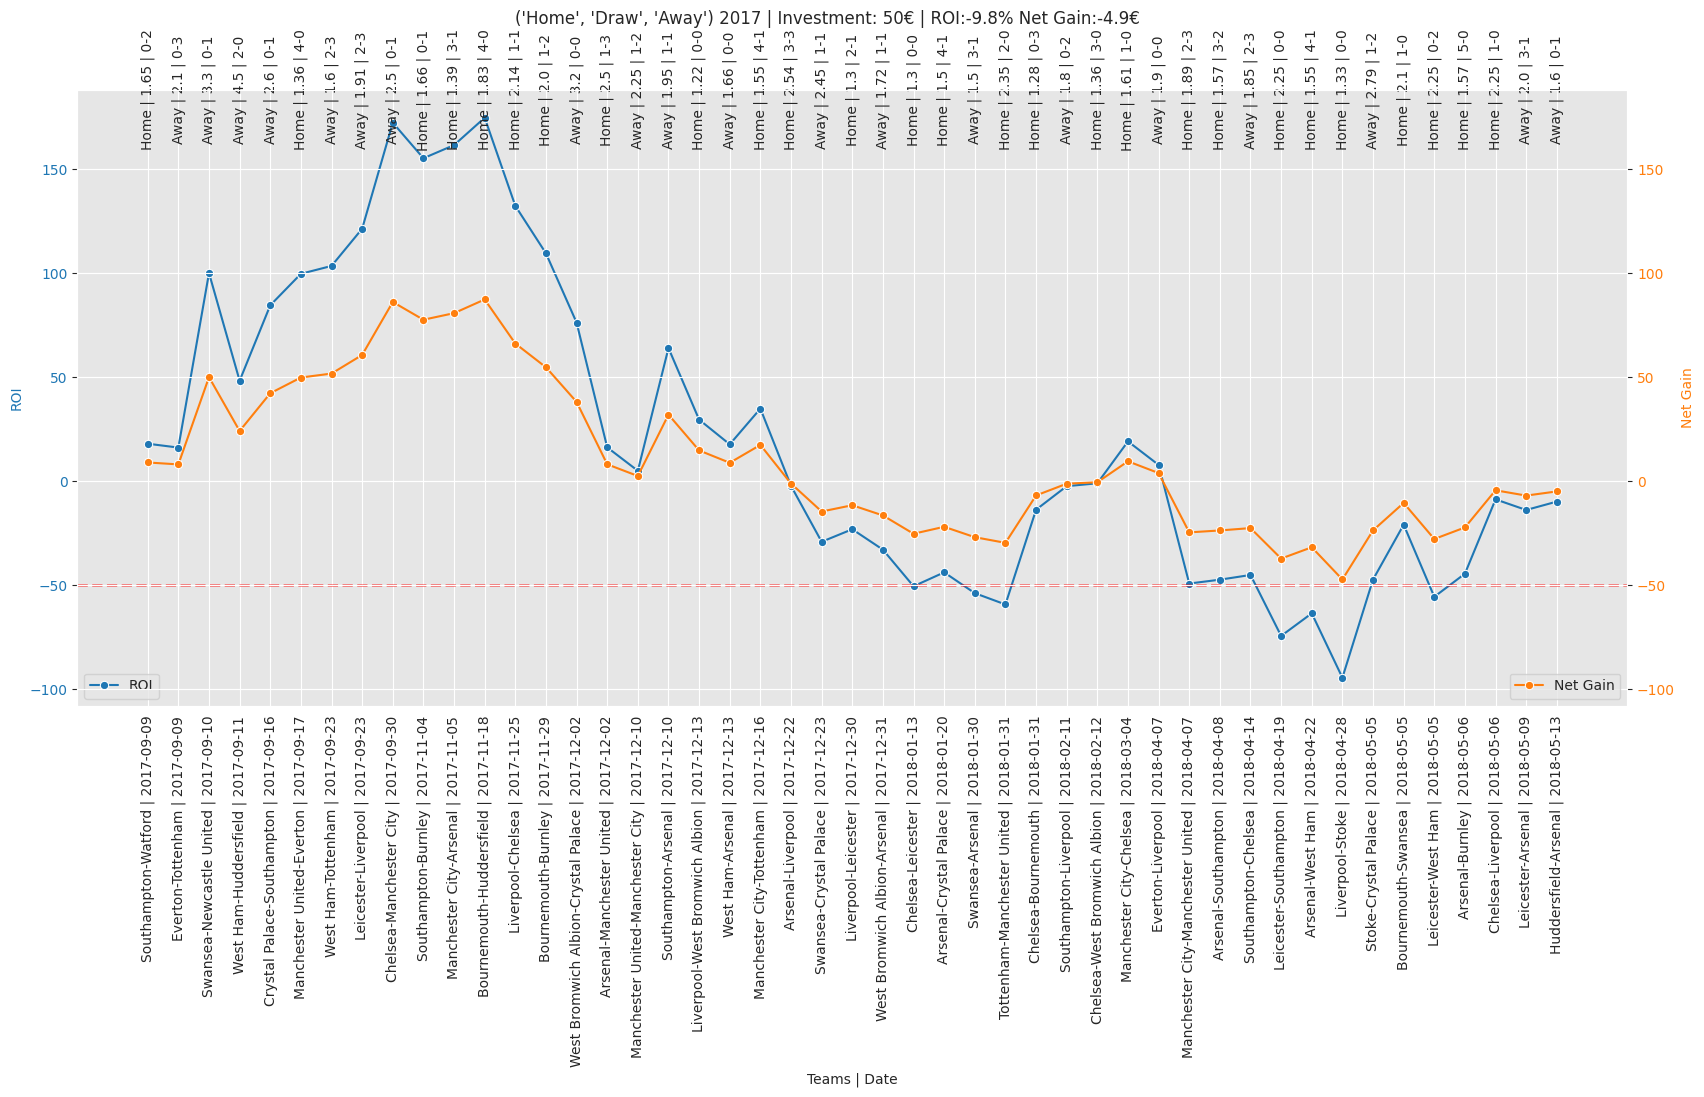

Date             HTeam                    ATeam        Result  \
30  2018-09-01         Leicester                Liverpool  ['1 ', ' 2']   
32  2018-09-01           Chelsea              Bournemouth  ['2 ', ' 0']   
33  2018-09-01    Crystal Palace              Southampton  ['0 ', ' 2']   
34  2018-09-01           Everton             Huddersfield  ['1 ', ' 1']   
35  2018-09-01          West Ham  Wolverhampton Wanderers  ['0 ', ' 1']   
..         ...               ...                      ...           ...   
365 2019-05-04  Newcastle United                Liverpool  ['2 ', ' 3']   
366 2019-05-05           Chelsea                  Watford  ['3 ', ' 0']   
378 2019-05-12         Tottenham                  Everton  ['2 ', ' 2']   
371 2019-05-12           Burnley                  Arsenal  ['1 ', ' 3']   
373 2019-05-12            Fulham         Newcastle United  ['0 ', ' 4']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
30    7.50   5.00   1.44      1.65      2.25  Under  
32    1.30   6.00  11.00      1.42      2.82  Under  
33    2.00   3.50   4.20      2.12      1.72  Under  
34    1.53   4.20   7.50      2.07      1.75  Under  
35    2.60   3.40   2.87      1.85      1.95  Under  
..     ...    ...    ...       ...       ...    ...  
365   9.50   5.25   1.36      1.71      2.14  Under  
366   1.40   5.25   8.00      1.60      2.34   Over  
378   2.20   3.50   3.50      1.76      2.07   Over  
371   3.25   3.80   2.20      1.57      2.39  Under  
373   2.50   3.60   2.90      1.75      2.08  Under  

[146 rows x 10 columns]

[-33.00654383817775, -39.093044569623984, 10.813645720645852, 22.32487282726379, 30.442645887407224, 37.939874395458446, 24.732205297917375, 10.944702163435139, -4.995575830475616, -33.856547351997634, -16.975783461477192, -2.385302259677772, -3.8668577107008844, -18.529034931523626, -11.886080427531184, -6.221881592690664, -12.41526436431971, -16.35434436043444, -5.567767782662912, -10.473314605065324, -16.079622423297792, -47.27725536477472, -30.784715138432418, -32.047433204411576, -33.08827461149119, -12.01487667627359, -7.256519037367013, -26.543702965296262, -38.666405272002706, -24.004104972364487, -33.98309170669752, -47.865893404007586, -53.59815823962451, -55.769144885302396, -52.99664594856643, -43.080082115752596, -63.175266681818314, -66.10156209181753, -59.178216179005034, -49.983030662009014, -59.11572080177594, -52.2906978439965, -57.50547965631939, -47.48415216693648, -39.28520385836269, -42.29231680309148, -69.8670452718389, -57.0745101256628, -64.70881436862379, -71.

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




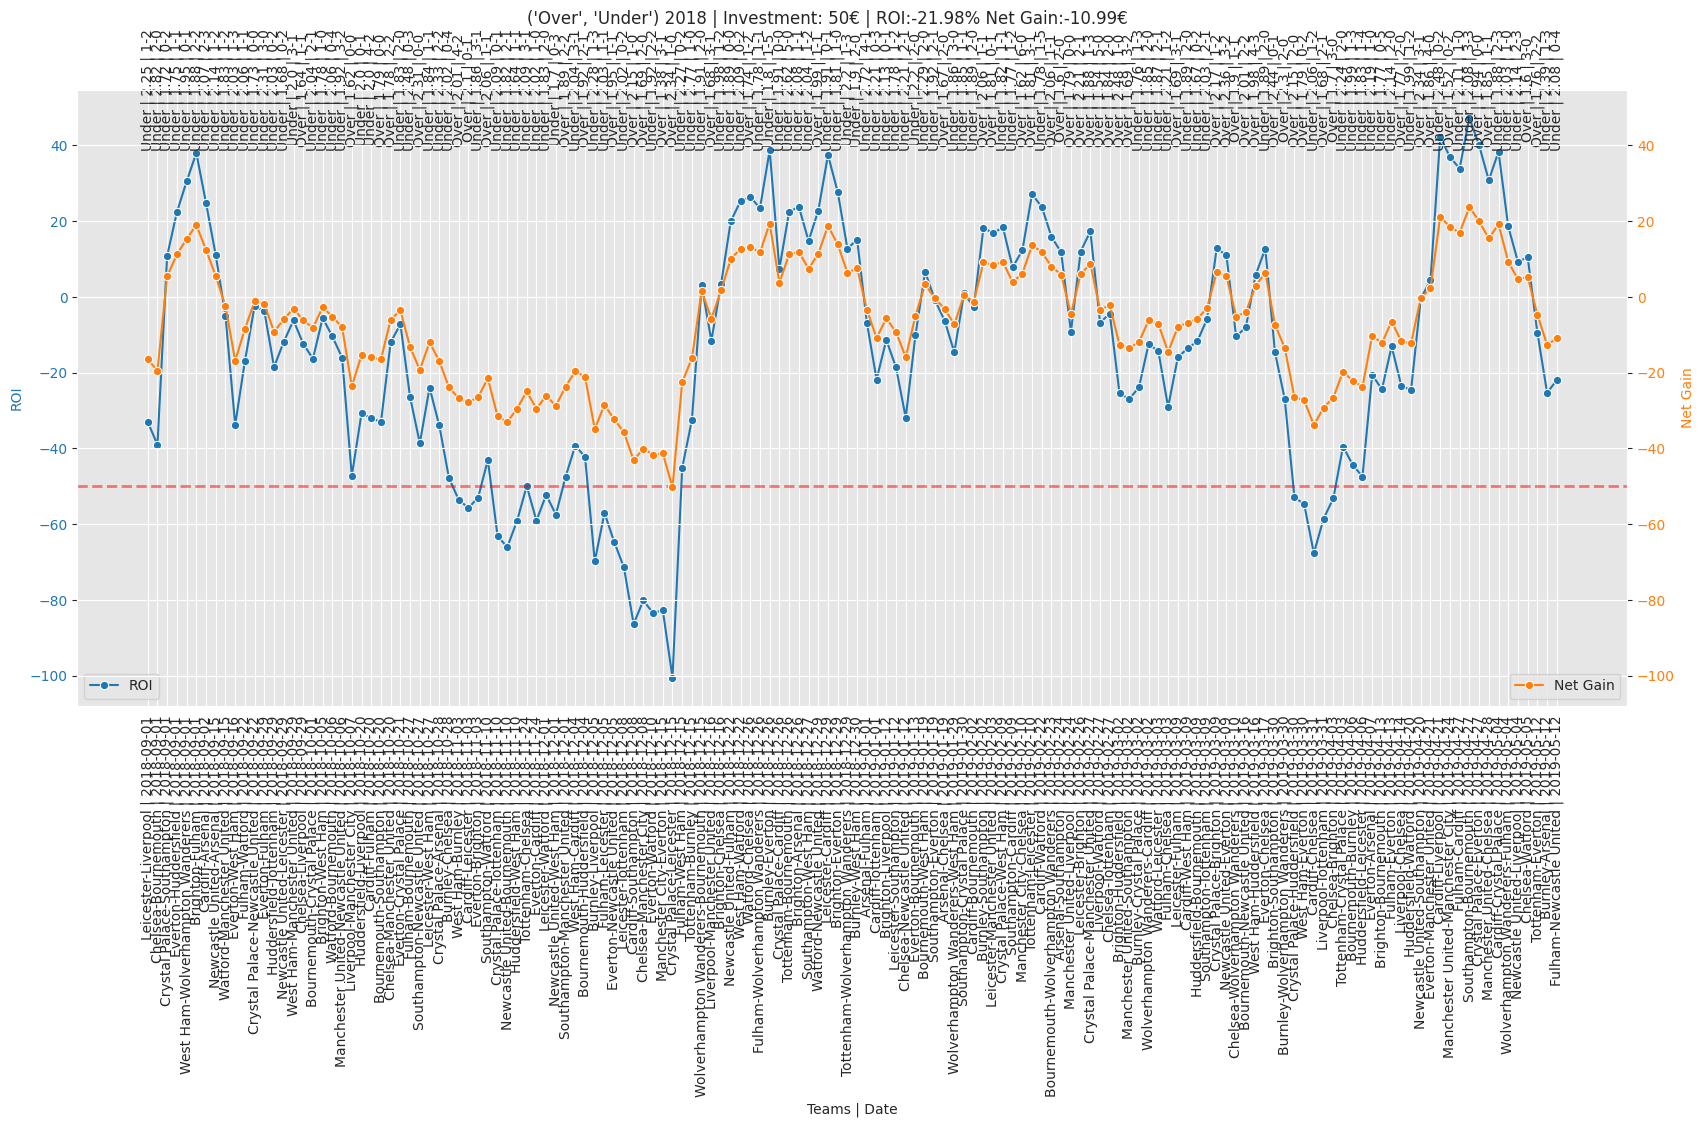

Date              HTeam                    ATeam        Result  \
31  2018-09-01           Brighton                   Fulham  ['2 ', ' 2']   
41  2018-09-15        Bournemouth                Leicester  ['4 ', ' 2']   
45  2018-09-15   Newcastle United                  Arsenal  ['1 ', ' 2']   
53  2018-09-22     Crystal Palace         Newcastle United  ['0 ', ' 0']   
51  2018-09-22            Burnley              Bournemouth  ['4 ', ' 0']   
69  2018-10-01        Bournemouth           Crystal Palace  ['2 ', ' 1']   
76  2018-10-06  Manchester United         Newcastle United  ['3 ', ' 2']   
80  2018-10-20            Chelsea        Manchester United  ['2 ', ' 2']   
93  2018-10-27        Southampton         Newcastle United  ['0 ', ' 0']   
99  2018-10-29          Tottenham          Manchester City  ['0 ', ' 1']   
113 2018-11-10   Newcastle United              Bournemouth  ['2 ', ' 1']   
117 2018-11-11            Chelsea                  Everton  ['0 ', ' 0']   
136 2018-12-01        Southampton        Manchester United  ['2 ', ' 2']   
140 2018-12-04        Bournemouth             Huddersfield  ['2 ', ' 1']   
142 2018-12-04           West Ham                  Cardiff  ['3 ', ' 1']   
195 2018-12-29          Liverpool                  Arsenal  ['5 ', ' 1']   
209 2019-01-03    Manchester City                Liverpool  ['2 ', ' 1']   
240 2019-02-02          Tottenham         Newcastle United  ['1 ', ' 0']   
247 2019-02-03          Leicester        Manchester United  ['0 ', ' 1']   
258 2019-02-10          Tottenham                Leicester  ['3 ', ' 1']   
259 2019-02-10    Manchester City                  Chelsea  ['6 ', ' 0']   
303 2019-03-17            Everton                  Chelsea  ['2 ', ' 0']   
312 2019-03-31          Liverpool                Tottenham  ['2 ', ' 1']   
323 2019-04-07            Everton                  Arsenal  ['1 ', ' 0']   
343 2019-04-21            Arsenal           Crystal Palace  ['2 ', ' 3']   
375 2019-05-12          Liverpool  Wolverhampton Wanderers  ['2 ', ' 0']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
31    2.30   3.40   3.40      1.92      1.88  Away  
41    2.45   3.50   3.00      1.88      1.94  Home  
45    4.20   3.80   1.90      1.71      2.14  Away  
53    2.14   3.40   3.75      2.11      1.73  Home  
51    3.00   3.40   2.50      2.02      1.80  Away  
69    2.25   3.50   3.40      1.77      2.04  Home  
76    1.44   4.50   9.00      1.89      1.92  Home  
80    1.75   3.80   5.25      1.78      2.04  Home  
93    2.10   3.40   3.90      2.31      1.61  Home  
99    4.75   4.10   1.75      1.58      2.36  Away  
113   2.90   3.40   2.60      2.00      1.82  Away  
117   1.40   5.25   8.50      1.55      2.43  Home  
136   4.33   3.60   1.95      1.89      1.92  Away  
140   1.66   3.80   6.00      1.92      1.89  Home  
142   1.66   4.00   5.75      1.79      2.04  Home  
195   1.50   4.50   5.75      1.51      2.55  Home  
209   2.04   3.80   3.60      1.54      2.47  Home  
240   1.44   4.50   9.00      1.84      1.98  Home  
247   3.60   3.50   2.15      1.81      2.02  Away  
258   1.70   3.90   5.50      1.81      2.02  Home  
259   1.50   4.75   7.00      1.62      2.29  Home  
303   4.00   3.80   1.95      1.92      1.89  Away  
312   1.61   4.20   6.00      1.68      2.21  Home  
323   3.00   3.75   2.35      1.68      2.19  Away  
343   1.53   4.60   6.50      1.58      2.38  Home  
375   1.30   6.00  11.00      1.61      2.31  Home

[-37.81902163013631, 25.883889812380577, 33.88347910189057, 8.670517811128121, -16.781302759230556, 29.62273089320325, 33.262143512592104, 6.209592672063081, -19.436951334030567, 10.782112891061589, -21.42502505652749, -25.906934432919783, -29.971178766357056, -18.80073530359779, -15.584407474939269, -12.039540942544534, 19.342022710413687, 21.3732903726591, 37.59103945564229, 65.12574207304965, 70.41649601971136, 64.95560080542276, 71.77309871482689, 43.86933638671655, 26.18583648734075, 28.5886987895245]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




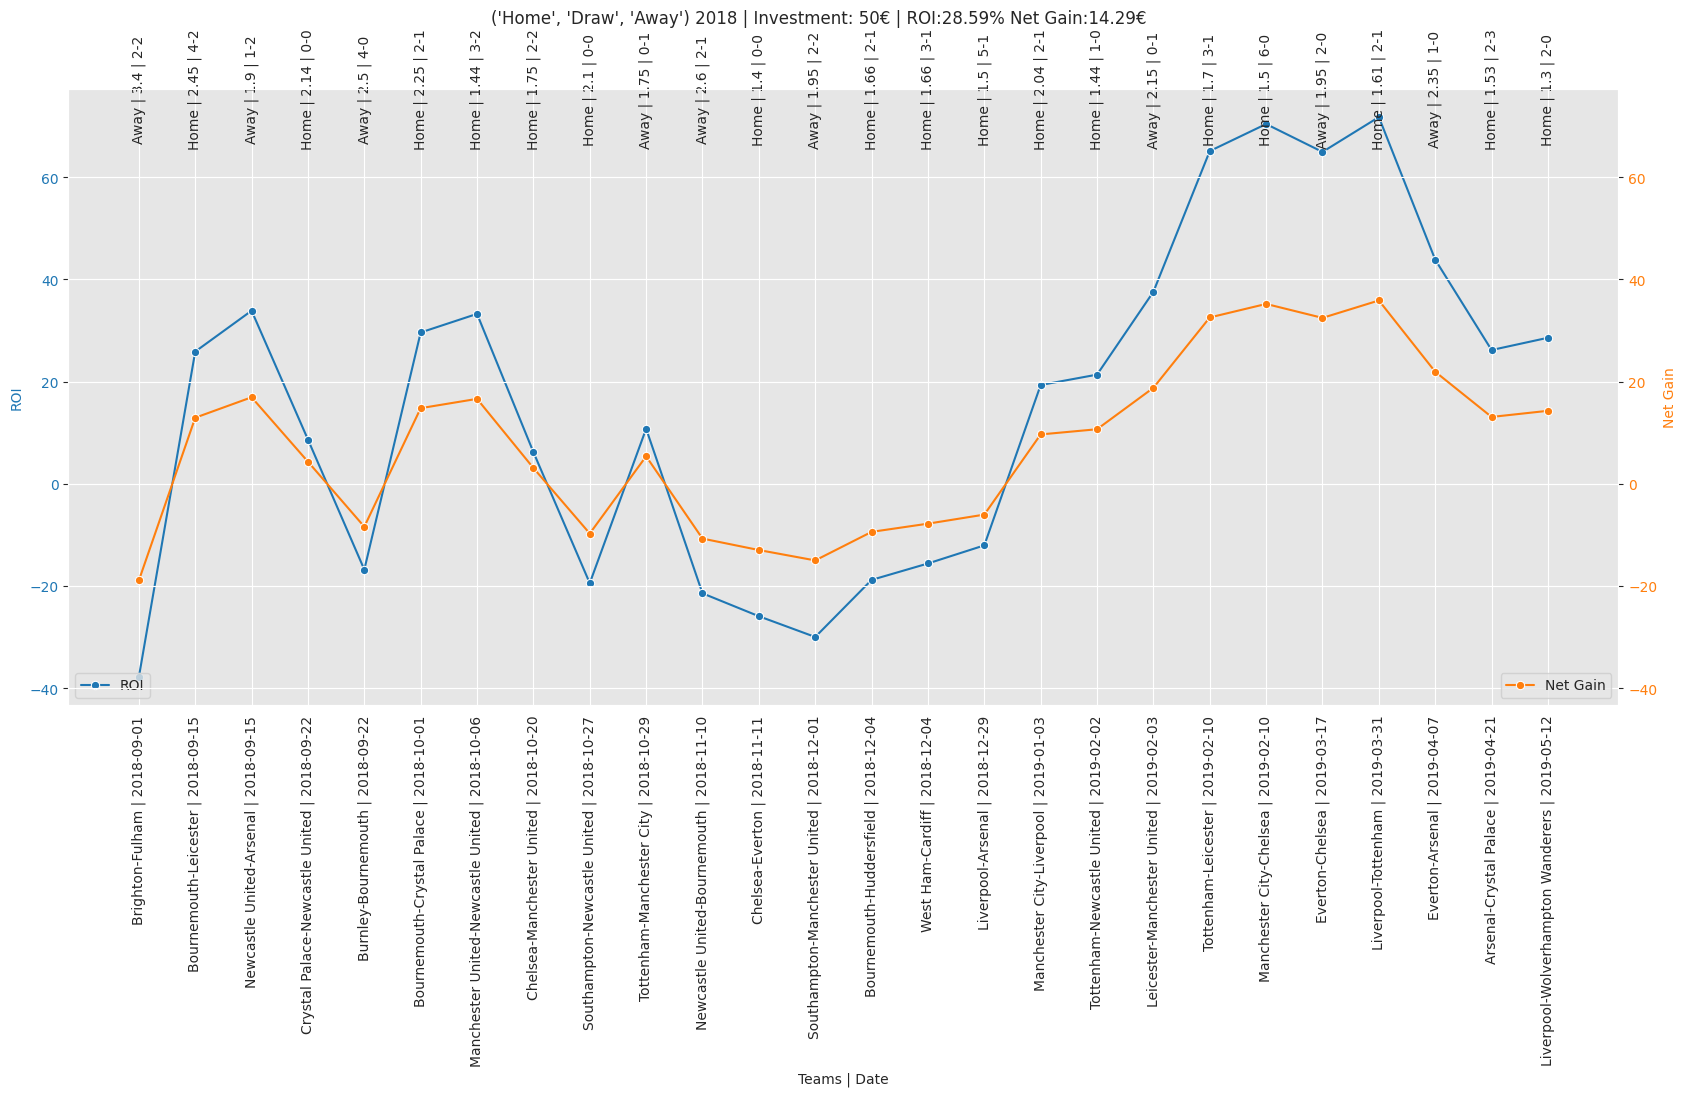

Date           HTeam                    ATeam        Result  B365H  \
30  2019-08-31     Southampton        Manchester United  ['1 ', ' 1']   3.80   
32  2019-08-31  Crystal Palace              Aston Villa  ['1 ', ' 0']   2.15   
33  2019-08-31       Leicester              Bournemouth  ['3 ', ' 1']   1.70   
37  2019-08-31         Burnley                Liverpool  ['0 ', ' 3']   9.50   
31  2019-08-31         Chelsea         Sheffield United  ['2 ', ' 2']   1.36   
..         ...             ...                      ...           ...    ...   
371 2020-07-26         Burnley                 Brighton  ['1 ', ' 2']   2.37   
372 2020-07-26         Chelsea  Wolverhampton Wanderers  ['2 ', ' 0']   1.85   
373 2020-07-26  Crystal Palace                Tottenham  ['1 ', ' 1']   6.00   
374 2020-07-26         Everton              Bournemouth  ['1 ', ' 3']   2.25   
379 2020-07-26        West Ham              Aston Villa  ['1 ', ' 1']   3.00   

     B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
30    3.30   2.05      1.90      1.90  Under  
32    3.30   3.50      1.90      1.90  Under  
33    4.00   4.75      1.66      2.20  Under  
37    5.50   1.30      1.61      2.30  Under  
31    4.75   9.00      1.72      2.10  Under  
..     ...    ...       ...       ...    ...  
371   3.40   3.00      1.90      1.90  Under  
372   3.80   4.00      1.90      1.90  Under  
373   4.20   1.55      1.72      2.10  Under  
374   3.70   3.00      1.57      2.37  Under  
379   3.60   2.30      1.66      2.20  Under  

[138 rows x 10 columns]

[10.0211265906795, -1.555739930640243, 7.21579207440358, -9.722177548173335, -49.837453213742386, -65.69731950609972, -91.1938414694566, -97.61874775856052, -110.10175464459691, -125.3203619750578, -126.42958153596368, -105.13795641837748, -79.09656152751678, -75.79078575928801, -79.00124848377905, -92.29856692512945, -90.16823455112332, -49.15586024036286, -55.37235274453189, -40.516147295252594, -33.921077747287285, -15.49199964392963, -40.93687153036015, -38.49512705852116, -32.099695483007395, -47.604436713837295, -63.61838215688732, -69.1538140940516, -78.78843162550191, -85.79903373485736, -80.23396111104854, -65.12242021683679, -76.19245743548387, -85.4396490782206, -76.96855200994278, -102.26713115782427, -126.38019577152889, -130.73057685220374, -131.77732975025305, -153.57032537607407, -147.38592636588174, -151.1027422003373, -132.31886098423112, -129.48375342540547, -132.3882028965764, -145.44705003045948, -143.53874118620683, -153.54298368985354, -133.35469615264324, -108.0

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




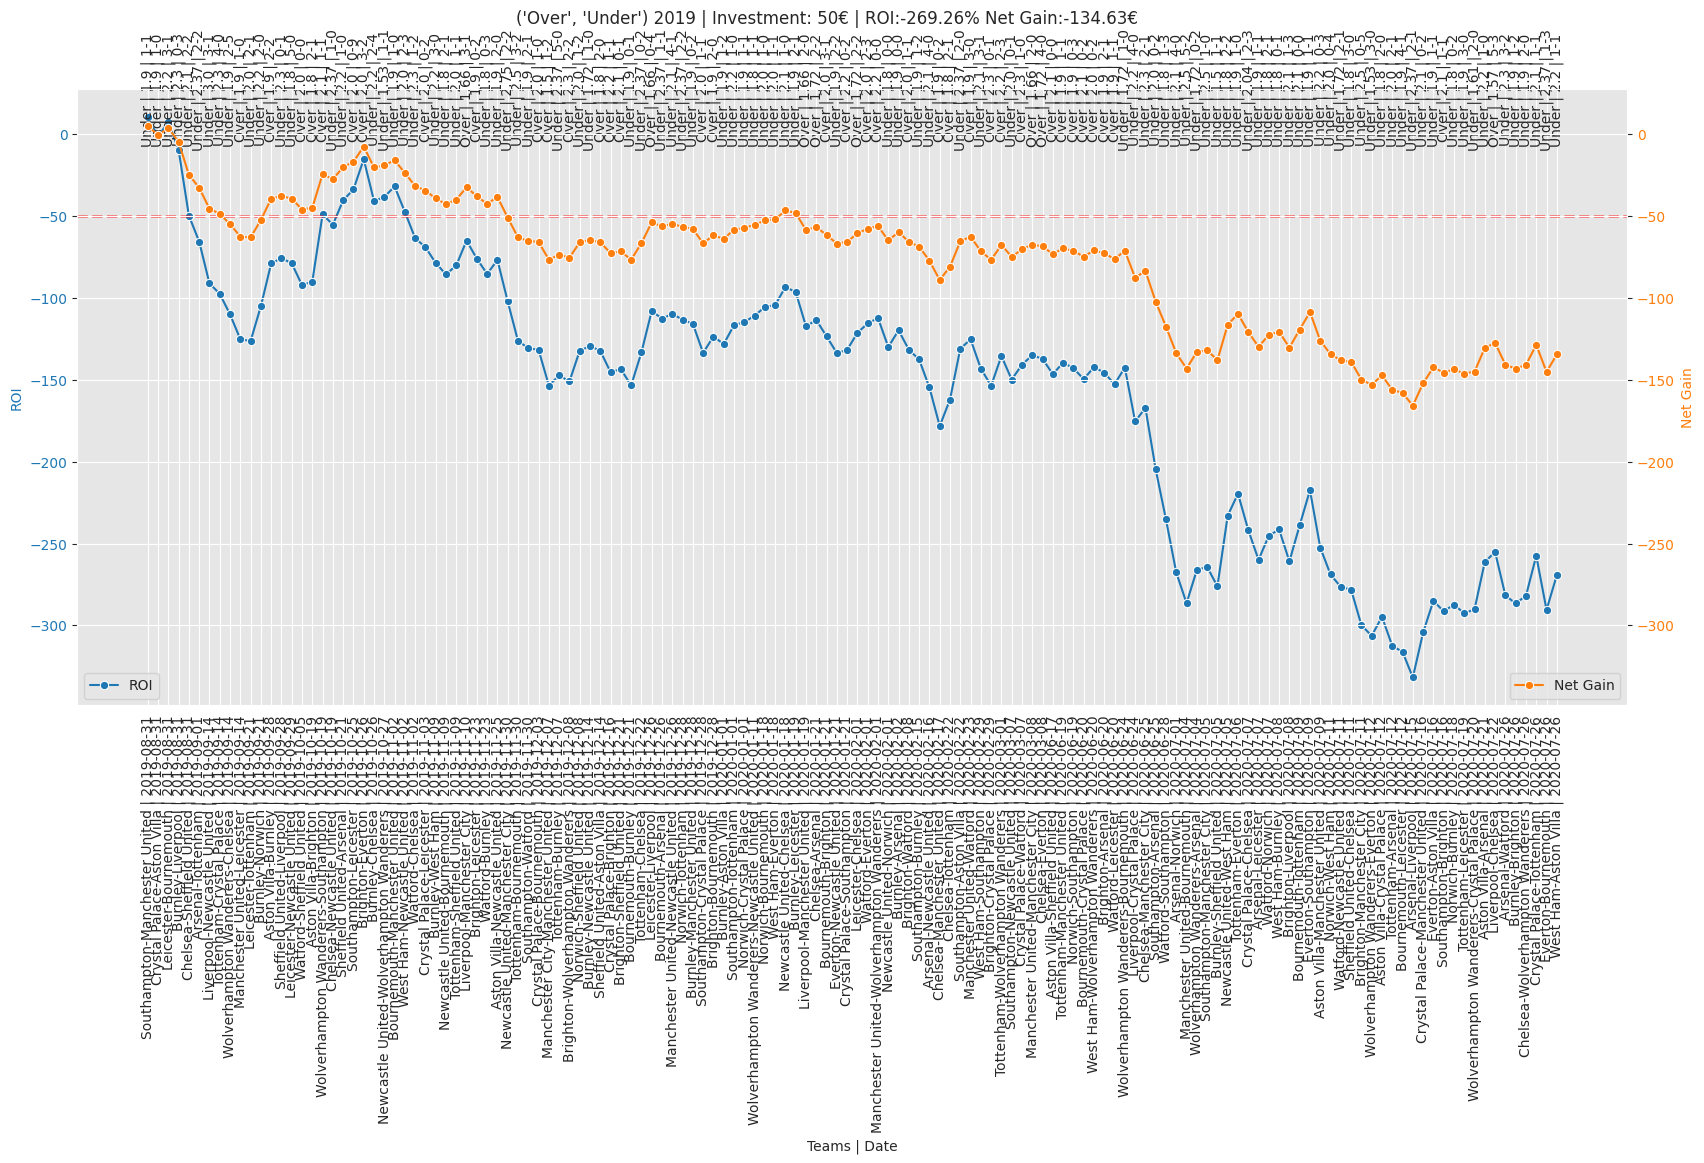

Date                    HTeam                    ATeam  \
49  2019-09-16              Aston Villa                 West Ham   
59  2019-09-22                  Chelsea                Liverpool   
83  2019-10-19                  Chelsea         Newcastle United   
95  2019-10-26                  Burnley                  Chelsea   
98  2019-10-27                Liverpool                Tottenham   
106 2019-11-02                 West Ham         Newcastle United   
127 2019-11-23          Manchester City                  Chelsea   
154 2019-12-07          Manchester City        Manchester United   
155 2019-12-08              Aston Villa                Leicester   
185 2019-12-26         Sheffield United                  Watford   
228 2020-01-19                Liverpool        Manchester United   
234 2020-01-21                  Chelsea                  Arsenal   
260 2020-02-22                  Chelsea                Tottenham   
273 2020-02-29         Newcastle United                  Burnley   
286 2020-03-08        Manchester United          Manchester City   
289 2020-06-17          Manchester City                  Arsenal   
303 2020-06-24         Newcastle United              Aston Villa   
305 2020-06-24  Wolverhampton Wanderers              Bournemouth   
308 2020-06-25              Southampton                  Arsenal   
307 2020-06-25                  Burnley                  Watford   
311 2020-06-28                  Watford              Southampton   
314 2020-07-01              Bournemouth         Newcastle United   
318 2020-07-02         Sheffield United                Tottenham   
324 2020-07-04                  Chelsea                  Watford   
327 2020-07-05                Liverpool              Aston Villa   
343 2020-07-11         Sheffield United                  Chelsea   
345 2020-07-12  Wolverhampton Wanderers                  Everton   
354 2020-07-15                  Arsenal                Liverpool   
365 2020-07-20  Wolverhampton Wanderers           Crystal Palace   
372 2020-07-26                  Chelsea  Wolverhampton Wanderers   
378 2020-07-26              Southampton         Sheffield United   

           Result  B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
49   ['0 ', ' 0']   2.62   3.50   2.60      1.61      2.30  Away  
59   ['1 ', ' 2']   3.50   3.75   2.00      1.57      2.37  Away  
83   ['1 ', ' 0']   1.30   5.50  10.00      1.57      2.37  Home  
95   ['2 ', ' 4']   4.50   4.00   1.72      1.66      2.20  Away  
98   ['2 ', ' 1']   1.50   4.33   6.50      1.53      2.50  Home  
106  ['2 ', ' 3']   1.75   3.80   4.50      1.80      2.00  Home  
127  ['2 ', ' 1']   1.44   5.00   6.50      1.40      3.00  Home  
154  ['1 ', ' 2']   1.30   5.50  10.00      1.50      2.62  Home  
155  ['1 ', ' 4']   4.33   3.80   1.80      1.61      2.30  Away  
185  ['1 ', ' 1']   1.83   3.60   4.33      2.10      1.72  Home  
228  ['2 ', ' 0']   1.36   5.25   8.00      1.66      2.20  Home  
234  ['2 ', ' 2']   1.72   3.90   4.50      1.72      2.10  Home  
260  ['2 ', ' 1']   1.72   4.00   4.50      1.80      2.00  Home  
273  ['0 ', ' 0']   2.62   3.10   2.90      2.30      1.61  Away  
286  ['2 ', ' 0']   5.00   4.33   1.60      1.66      2.20  Away  
289  ['3 ', ' 0']   1.36   5.25   7.50      1.36      3.20  Home  
303  ['1 ', ' 1']   2.30   3.30   3.20      2.10      1.72  Home  
305  ['1 ', ' 0']   1.55   4.00   6.00      2.10      1.72  Home  
308  ['0 ', ' 2']   2.60   3.50   2.62      1.80      2.00  Home  
307  ['1 ', ' 0']   3.00   3.25   2.45      2.20      1.66  Away  
311  ['1 ', ' 3']   2.50   3.30   2.87      2.00      1.80  Away  
314  ['1 ', ' 4']   2.40   3.10   3.20      2.37      1.57  Away  
318  ['3 ', ' 1']   4.20   3.40   1.95      2.20      1.66  Away  
324  ['3 ', ' 0']   1.40   4.75   8.00      1.72      2.10  Home  
327  ['2 ', ' 0']   1.33   5.50   8.50      1.50      2.62  Home  
343  ['3 ', ' 0']   6.00   3.80   1.60      2.00      1.80  Away  
345  ['3 ', ' 0']   2.05

[-25.760532122056603, -17.904449381345643, -12.1907327698555, -7.563957062530519, 6.043620126309236, -19.242654725263577, -17.832705218315624, -36.77466771122696, -19.60858811452391, -32.797973658113975, -30.486816299613967, -38.31063843887344, -33.43555673105082, -58.87145952675253, -62.87910627811138, -49.98991476189915, -114.35096581466742, -90.35787704348928, -118.30780343984685, -176.58215691463153, -121.57130907055858, -44.98642512180961, -53.136246193469134, -34.57659764471629, -22.178834554473838, -26.465085372352377, 2.690543360521346, 0.5435034335586124, 1.8339640468600038, 35.56628380204597, 65.5408089096689]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




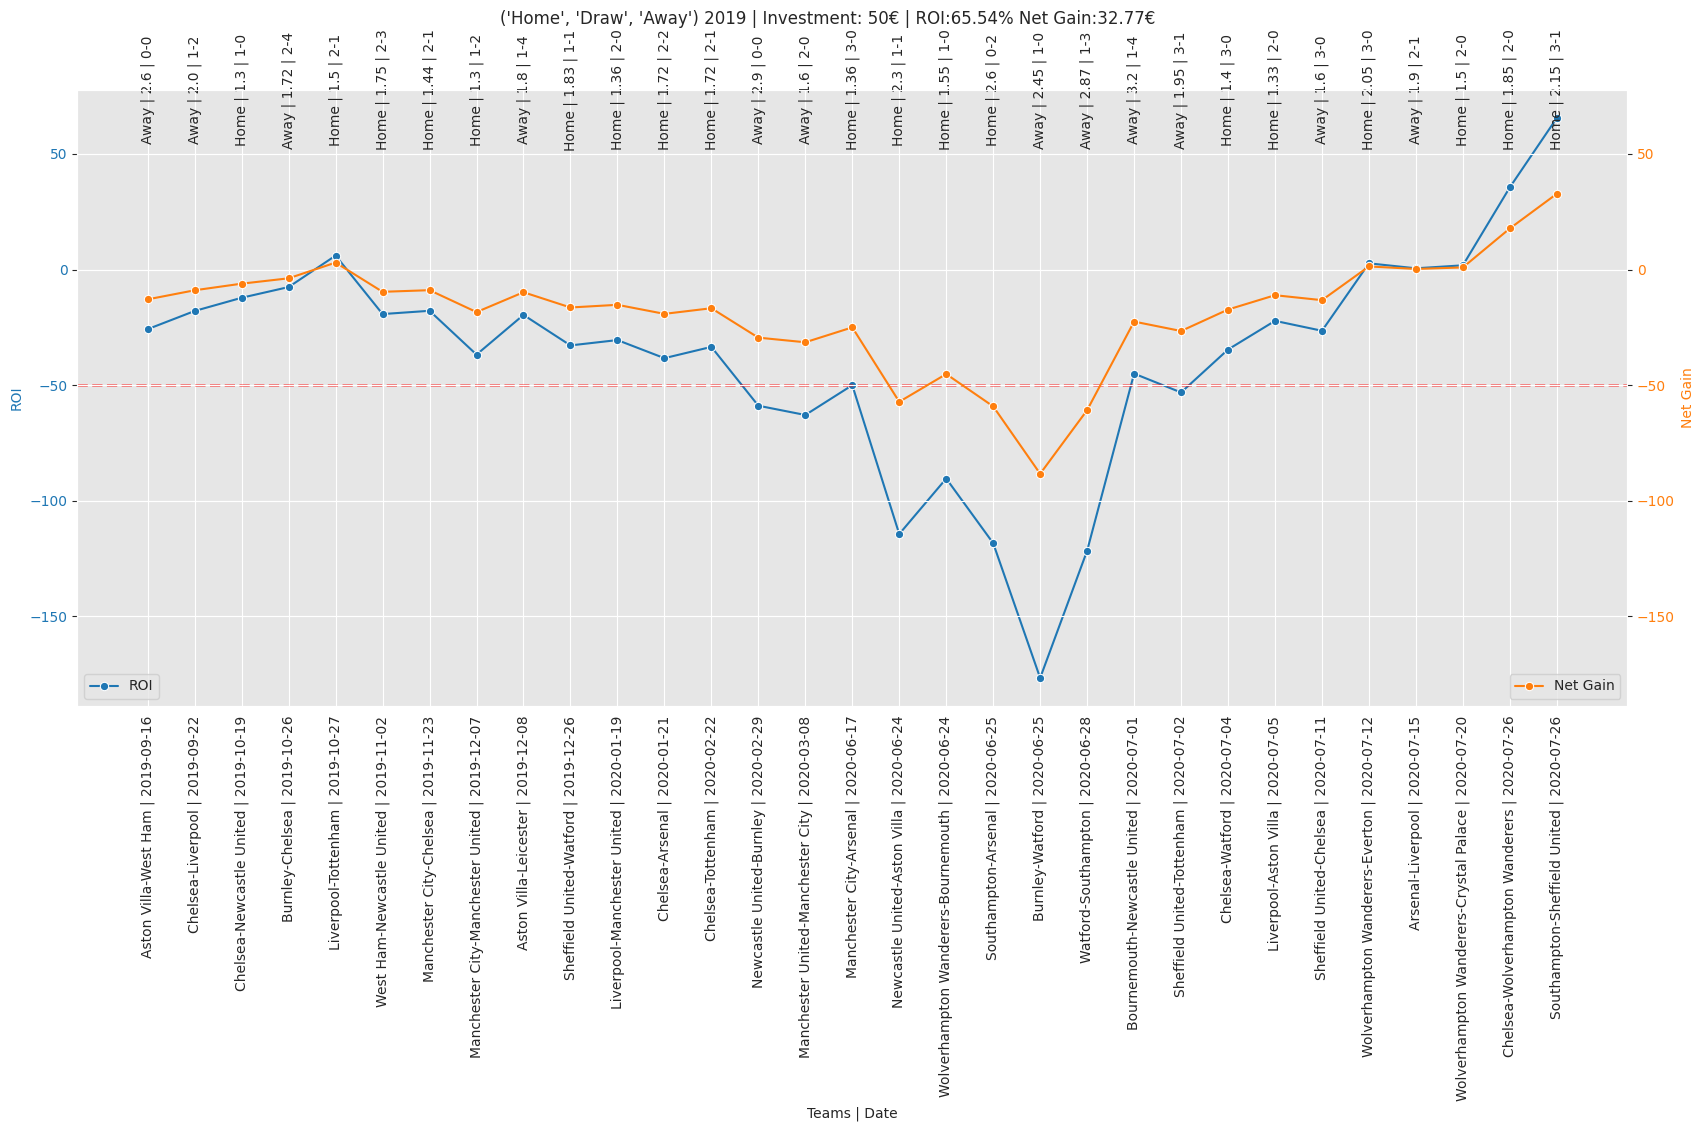

Date                    HTeam                 ATeam        Result  \
30  2020-10-03                    Leeds       Manchester City  ['1 ', ' 1']   
33  2020-10-04              Southampton  West Bromwich Albion  ['2 ', ' 0']   
35  2020-10-04  Wolverhampton Wanderers                Fulham  ['1 ', ' 0']   
36  2020-10-04        Manchester United             Tottenham  ['1 ', ' 6']   
32  2020-10-04                Leicester              West Ham  ['0 ', ' 3']   
..         ...                      ...                   ...           ...   
365 2021-05-19         Newcastle United      Sheffield United  ['1 ', ' 0']   
369 2021-05-19     West Bromwich Albion              West Ham  ['1 ', ' 3']   
372 2021-05-23                   Fulham      Newcastle United  ['0 ', ' 2']   
370 2021-05-23                  Arsenal              Brighton  ['2 ', ' 0']   
379 2021-05-23  Wolverhampton Wanderers     Manchester United  ['1 ', ' 2']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
30    7.50   5.25   1.36      1.36      3.20  Under  
33    1.72   3.80   4.75      1.80      2.00  Under  
35    1.50   4.00   7.50      2.10      1.72  Under  
36    1.85   3.80   4.00      1.72      2.10  Under  
32    1.61   4.20   5.25      1.66      2.20  Under  
..     ...    ...    ...       ...       ...    ...  
365   1.72   3.80   4.75      1.80      2.00  Under  
369   5.00   4.33   1.60      1.57      2.37  Under  
372   2.05   3.80   3.30      1.61      2.30  Under  
370   1.57   4.33   5.25      1.72      2.10  Under  
379   2.50   3.50   2.70      1.72      2.10  Under  

[145 rows x 10 columns]

[101.80049607905073, 90.95278291868459, 121.9535509271671, 128.84227526710632, 131.7382397629138, 124.2786180273236, 104.81607469513871, 159.9199708795112, 139.99960091612616, 121.61751605669255, 139.69210208184163, 143.30507615306402, 217.16056618199434, 208.61376963558922, 221.74118904685577, 233.68883841089718, 256.96972849149995, 298.1386158068659, 285.607539958794, 275.9856893771224, 294.12467715512, 284.89835884174437, 305.9720429146134, 329.8387118834892, 322.692423308364, 312.761002517881, 331.88528006724385, 358.41927786311885, 387.18239758121445, 389.9640604088912, 418.0613103852554, 438.10974876600676, 429.097844954455, 440.634335803727, 444.47159864243906, 447.0861393344138, 450.69254295735004, 431.3536261881281, 407.63981633859623, 396.80685013381446, 371.1093632566411, 367.8174494541216, 377.2744137324629, 372.52825587060215, 358.94990854779724, 419.6510209280516, 410.66631056464735, 418.40874953955847, 414.9780074076779, 408.55675850015984, 435.0820835680231, 440.0011646

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




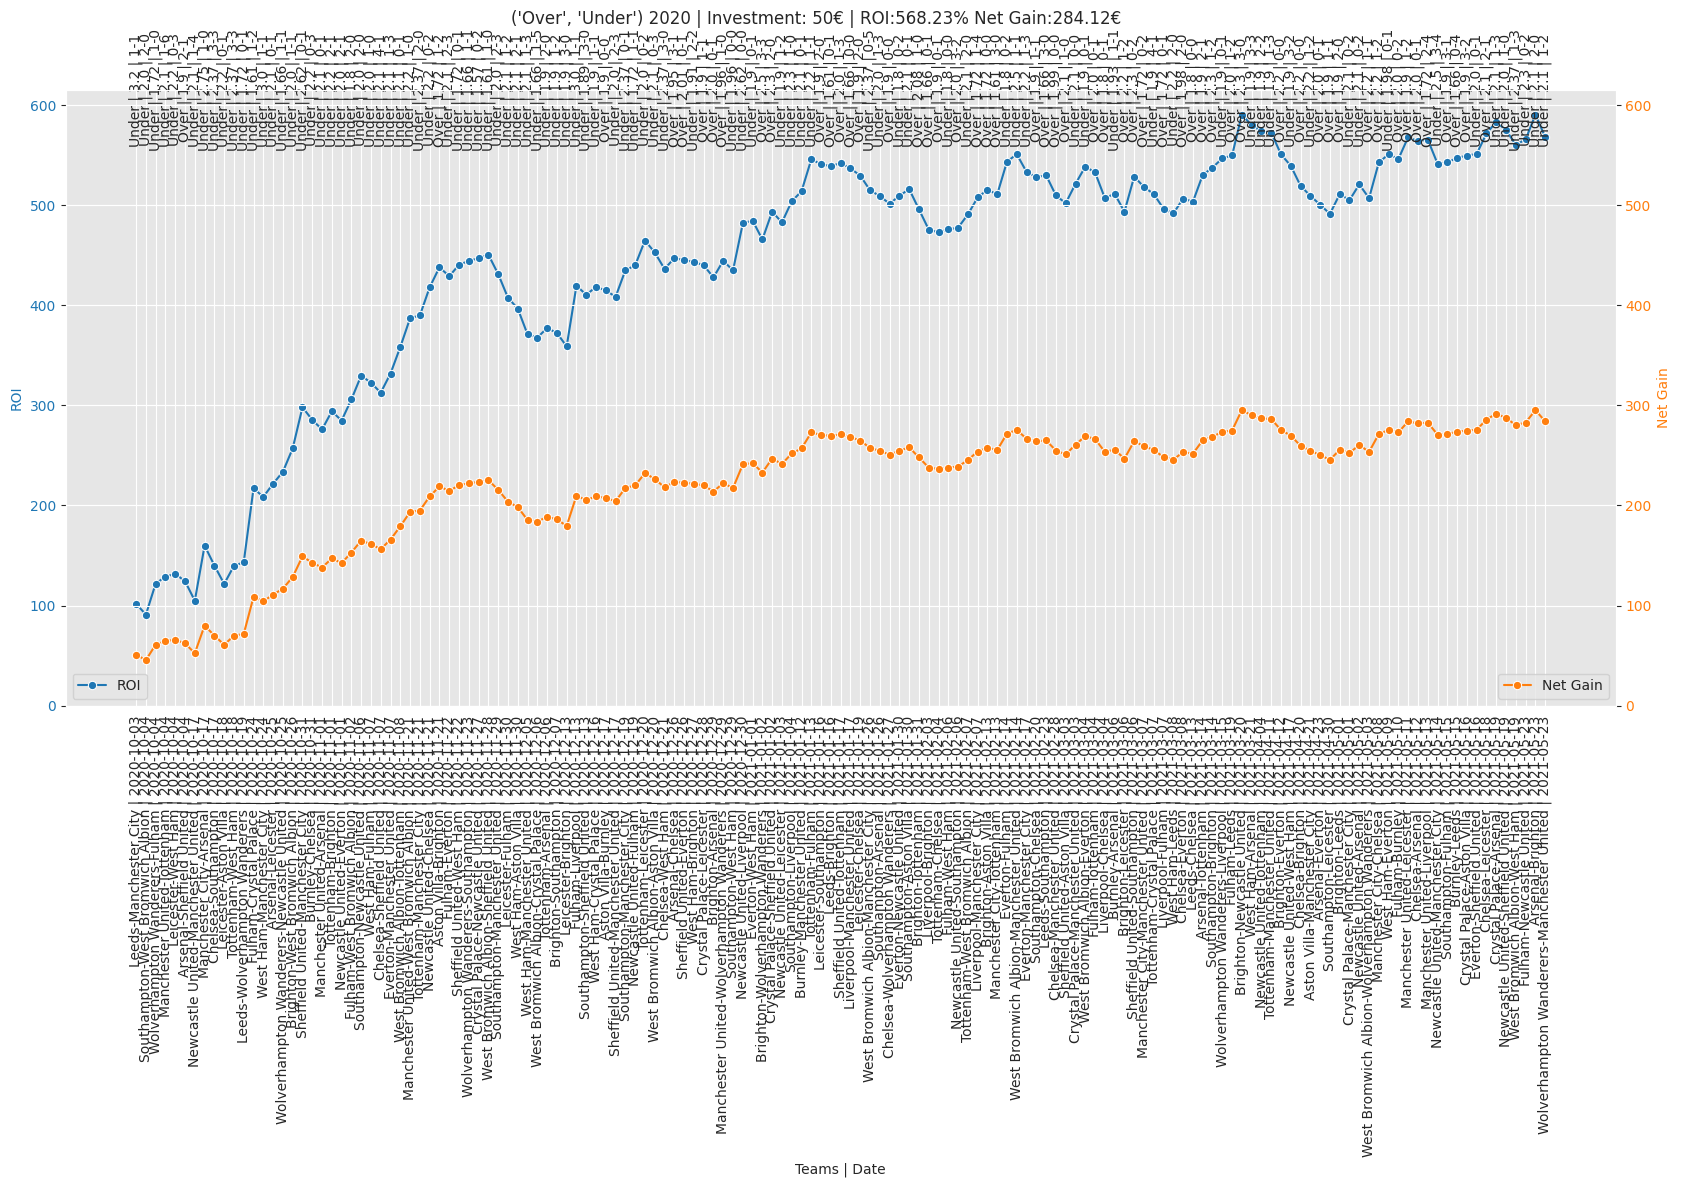

Date                 HTeam                    ATeam        Result  \
33  2020-10-04           Southampton     West Bromwich Albion  ['2 ', ' 0']   
36  2020-10-04     Manchester United                Tottenham  ['1 ', ' 6']   
34  2020-10-04               Arsenal         Sheffield United  ['2 ', ' 1']   
43  2020-10-18        Crystal Palace                 Brighton  ['1 ', ' 1']   
56  2020-10-26              Brighton     West Bromwich Albion  ['1 ', ' 1']   
61  2020-10-31             Liverpool                 West Ham  ['2 ', ' 1']   
85  2020-11-22             Liverpool                Leicester  ['3 ', ' 0']   
94  2020-11-29               Chelsea                Tottenham  ['0 ', ' 0']   
120 2020-12-16                 Leeds         Newcastle United  ['5 ', ' 2']   
124 2020-12-16             Liverpool                Tottenham  ['2 ', ' 1']   
125 2020-12-17           Aston Villa                  Burnley  ['0 ', ' 0']   
136 2020-12-21               Chelsea                 West Ham  ['3 ', ' 0']   
138 2020-12-26           Aston Villa           Crystal Palace  ['3 ', ' 0']   
143 2020-12-27                 Leeds                  Burnley  ['1 ', ' 0']   
153 2020-12-29     Manchester United  Wolverhampton Wanderers  ['1 ', ' 0']   
152 2020-12-29  West Bromwich Albion                    Leeds  ['0 ', ' 5']   
157 2021-01-02             Tottenham                    Leeds  ['3 ', ' 0']   
185 2021-01-26      Newcastle United                    Leeds  ['1 ', ' 2']   
190 2021-01-27               Chelsea  Wolverhampton Wanderers  ['0 ', ' 0']   
191 2021-01-27              Brighton                   Fulham  ['0 ', ' 0']   
194 2021-01-28             Tottenham                Liverpool  ['1 ', ' 3']   
219 2021-02-06     Manchester United                  Everton  ['3 ', ' 3']   
224 2021-02-08                 Leeds           Crystal Palace  ['2 ', ' 0']   
240 2021-02-20             Liverpool                  Everton  ['0 ', ' 2']   
245 2021-02-21     Manchester United         Newcastle United  ['3 ', ' 1']   
246 2021-02-22              Brighton           Crystal Palace  ['1 ', ' 2']   
247 2021-02-23                 Leeds              Southampton  ['3 ', ' 0']   
248 2021-02-27       Manchester City                 West Ham  ['2 ', ' 1']   
264 2021-03-04             Liverpool                  Chelsea  ['0 ', ' 1']   
268 2021-03-06              Brighton                Leicester  ['1 ', ' 2']   
271 2021-03-07       Manchester City        Manchester United  ['0 ', ' 2']   
273 2021-03-08               Chelsea                  Everton  ['2 ', ' 0']   
283 2021-03-14               Arsenal                Tottenham  ['2 ', ' 1']   
287 2021-03-20              Brighton         Newcastle United  ['3 ', ' 0']   
309 2021-04-12              Brighton                  Everton  ['0 ', ' 0']   
313 2021-04-18               Arsenal                   Fulham  ['1 ', ' 1']   
320 2021-04-23               Arsenal                  Everton  ['0 ', ' 1']   
331 2021-05-01               Chelsea                   Fulham  ['2 ', ' 0']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
33    1.72   3.80   4.75      1.80      2.00  Home  
36    1.85   3.80   4.00      1.72      2.10  Away  
34    1.57   4.00   6.00      1.90      1.90  Home  
43    2.62   3.30   2.70      2.20      1.66  Away  
56    1.70   4.00   4.75      1.80      2.00  Home  
61    1.36   5.25   7.50      1.40      3.00  Home  
85    1.85   4.00   3.80      1.57      2.37  Home  
94    2.05   3.50   3.60      1.72      2.10  Home  
120   1.75   4.00   4.33      1.72      2.10  Home  
124   1.75   3.80   4.50      1.66      2.20  Home  
125   1.75   3.80   4.50      1.90      1.90  Home  
136   1.44   5.00   6.25      1.57      2.37  Home  
138   1.90   3.75   3.80      1.72      2.10  Home  
143   1.72   4.00   4.33      1.57      2.37  Home  
153   1.53   4.20   6.25      1.96      1.94  Home  
152   3.60   3.60   2.00      1.57      2.37  Away  
157   1.75   4.10   4.20   

[21.508416365049357, 32.378987592999096, 159.69762595143789, 131.56872250201954, 106.95070231160918, 113.23469770280467, 140.05532110185257, 116.0819185857618, 132.8124960013268, 152.6891849545027, 139.25194406915654, 142.82572485835692, 166.5040642237284, 177.79388854554833, 202.53841041039198, 207.11980650554142, 171.9924017006373, 176.26827255977668, 166.7486214154942, 141.11547544273208, 152.48182825809397, 142.587664619549, 157.49625847077243, 118.40051184049901, 122.10651241212472, 93.4702947634114, 140.31772738041565, 141.87837385261625, 108.57236919408408, 73.22244722050803, 49.52562347710179, 57.294288594287735, 114.0778287912168, 132.79721763648644, 94.75398715973179, 87.14410039061332, 66.12822353844413, 70.3377675389655]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




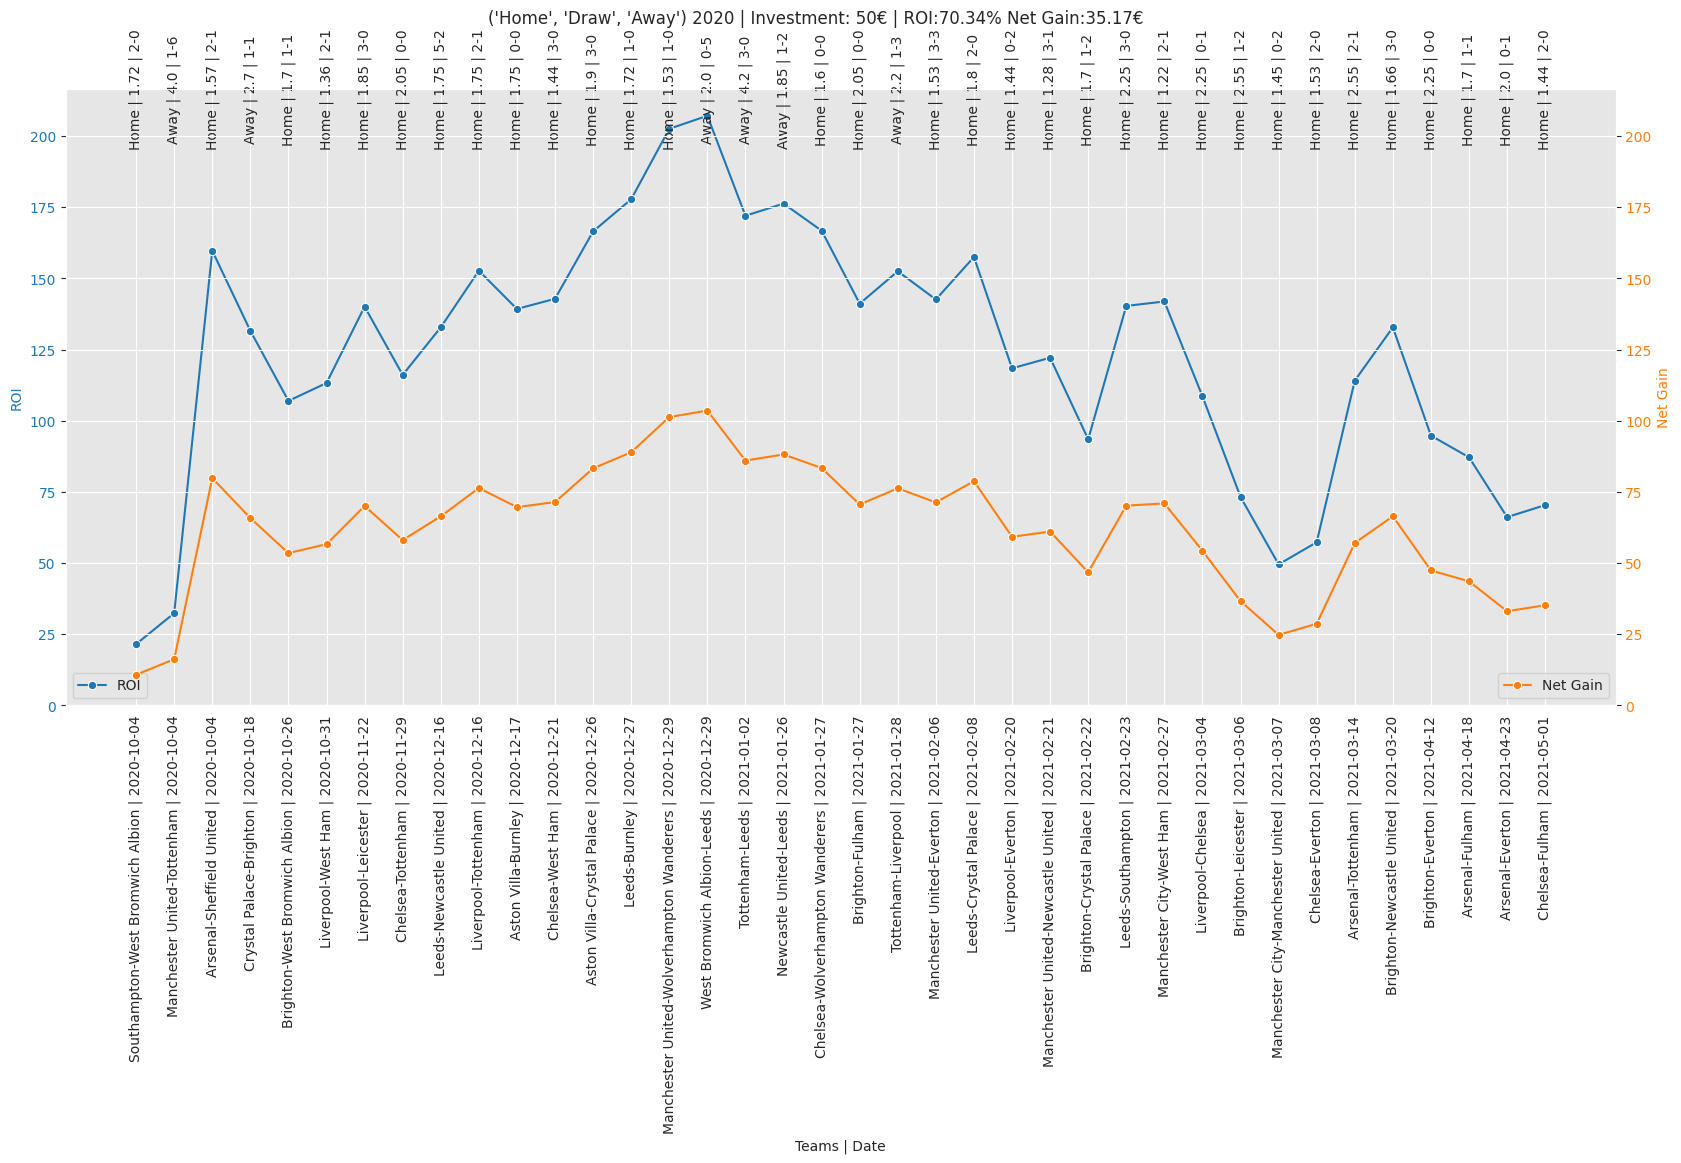

Date             HTeam              ATeam        Result  B365H  \
30  2021-09-11           Chelsea        Aston Villa  ['3 ', ' 0']   1.28   
35  2021-09-11           Arsenal            Norwich  ['1 ', ' 0']   1.50   
36  2021-09-11    Crystal Palace          Tottenham  ['3 ', ' 0']   4.20   
34  2021-09-11         Leicester    Manchester City  ['0 ', ' 1']   6.00   
32  2021-09-11       Southampton           West Ham  ['0 ', ' 0']   2.90   
..         ...               ...                ...           ...    ...   
364 2022-05-15           Everton          Brentford  ['2 ', ' 3']   2.05   
365 2022-05-16  Newcastle United            Arsenal  ['2 ', ' 0']   4.33   
369 2022-05-19           Chelsea          Leicester  ['1 ', ' 1']   1.40   
373 2022-05-22           Burnley   Newcastle United  ['1 ', ' 2']   2.25   
375 2022-05-22    Crystal Palace  Manchester United  ['1 ', ' 0']   3.00   

     B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
30    5.50  11.00      1.80      2.00   Over  
35    4.60   6.00      1.72      2.10  Under  
36    3.50   1.90      2.10      1.72  Under  
34    4.00   1.57      1.72      2.10  Under  
32    3.50   2.40      1.72      2.10  Under  
..     ...    ...       ...       ...    ...  
364   3.60   3.50      2.03      1.87  Under  
365   3.60   1.83      1.90      2.00  Under  
369   4.75   8.00      1.61      2.30   Over  
373   3.40   3.20      1.94      1.96  Under  
375   3.60   2.25      1.72      2.10  Under  

[148 rows x 10 columns]

[3.1711765847006745, 18.724248549894895, 51.185717220319674, 59.34317067374022, 54.373298451825434, 25.217279077293355, 11.965258548209905, 7.763577430960396, -12.482367313559307, -30.385510995872096, -46.85611688043598, -56.00450517672018, -81.77580434422137, -78.61906021229038, -72.64540147107938, -60.11873676477485, -71.2102132390057, -65.5473262262681, -69.72646121773151, -58.714174462232535, -56.088357811374564, -59.45244604047377, -43.799588888617265, -37.56755145356496, -51.283131262439035, -48.00756319663047, -53.02246269347754, -45.15682966105469, -48.54044023037671, -55.396576455495044, -72.83352262788901, -66.1214400422681, -89.49866460726687, -101.73833860626415, -84.22579561965068, -95.74047202583755, -99.22402368626535, -76.16975997847429, -64.29160033827351, -74.14793917781746, -85.51514606504705, -95.27307278504979, -74.39622518399574, -82.24816041211443, -86.0445012016504, -75.15441645300362, -95.1637378979574, -102.17942126638113, -103.99349120964058, -97.223935430316

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




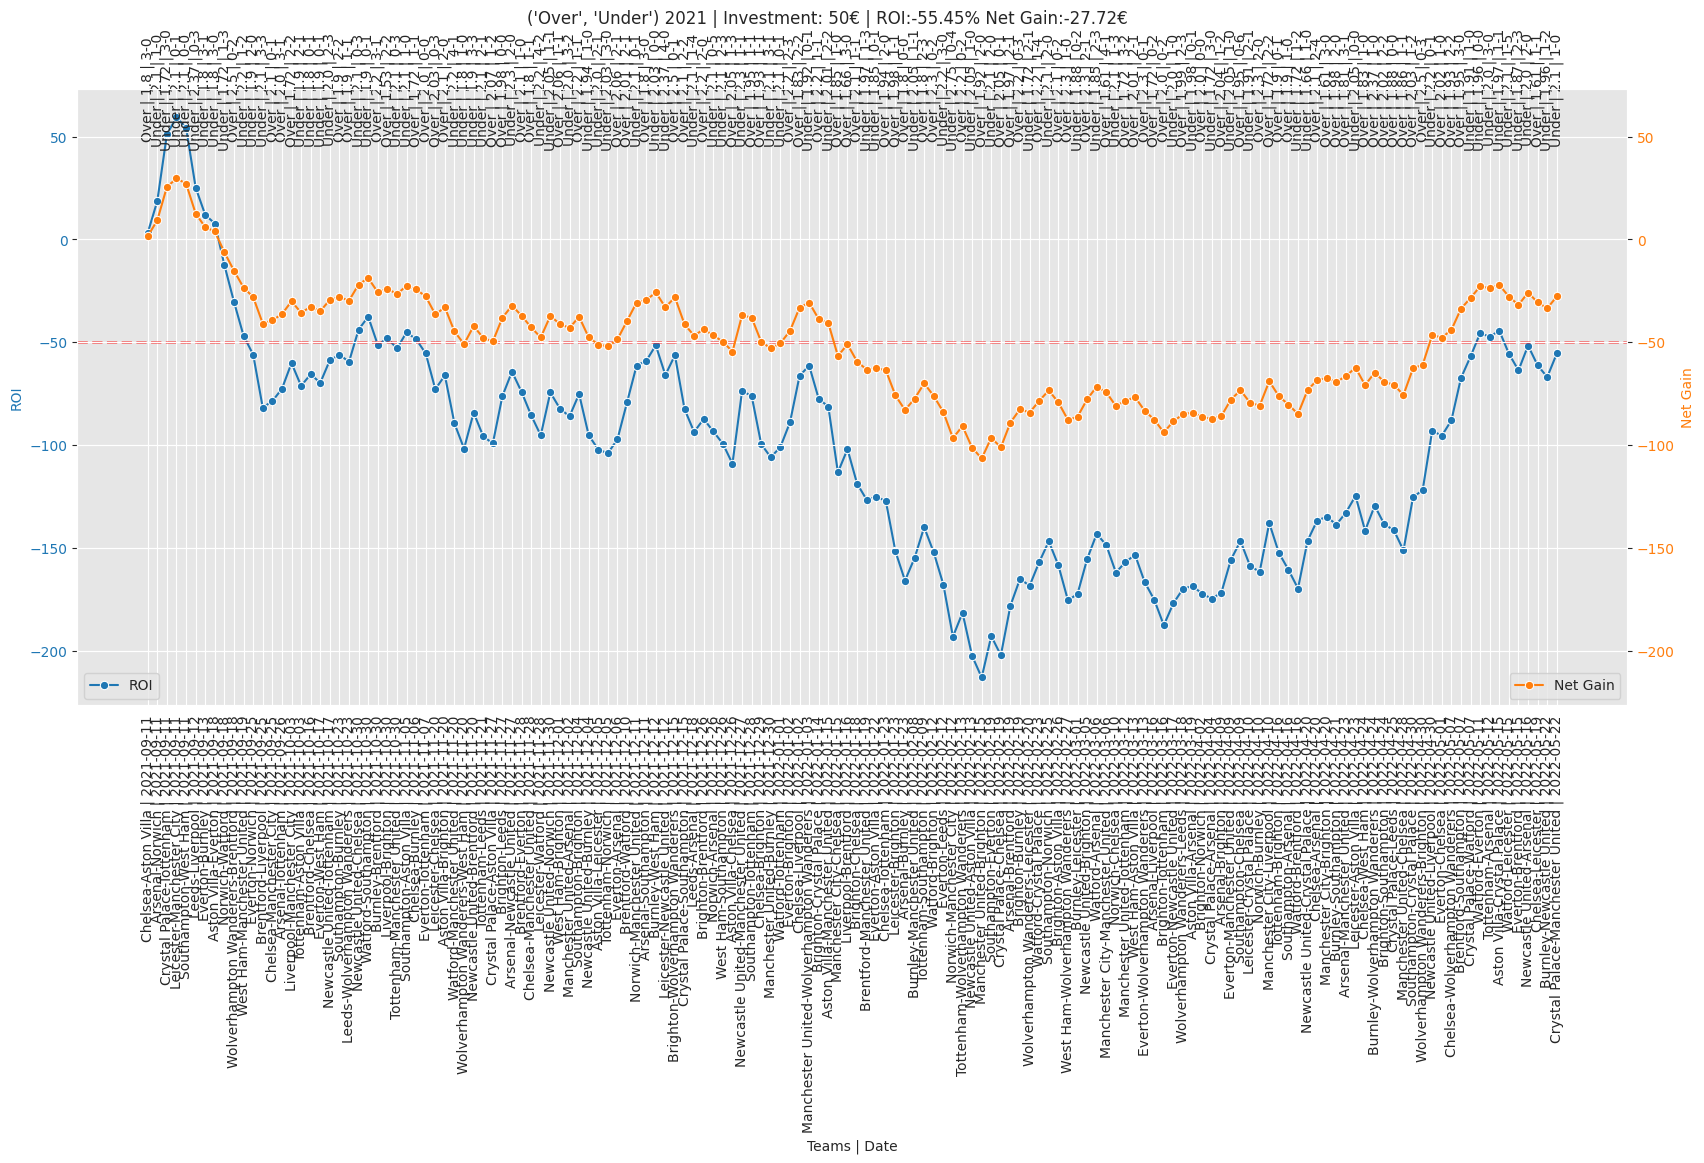

Date                    HTeam                    ATeam  \
32  2021-09-11              Southampton                 West Ham   
38  2021-09-12                    Leeds                Liverpool   
88  2021-10-24        Manchester United                Liverpool   
116 2021-11-20         Newcastle United                Brentford   
111 2021-11-20                Liverpool                  Arsenal   
121 2021-11-27                Liverpool              Southampton   
124 2021-11-27           Crystal Palace              Aston Villa   
128 2021-11-28                  Chelsea        Manchester United   
162 2021-12-15                 Brighton  Wolverhampton Wanderers   
190 2022-01-03        Manchester United  Wolverhampton Wanderers   
195 2022-01-15          Manchester City                  Chelsea   
202 2022-01-19                Leicester                Tottenham   
210 2022-01-23                  Arsenal                  Burnley   
220 2022-02-09                Tottenham              Southampton   
223 2022-02-10  Wolverhampton Wanderers                  Arsenal   
226 2022-02-12        Manchester United              Southampton   
231 2022-02-13                Tottenham  Wolverhampton Wanderers   
238 2022-02-19                 Brighton                  Burnley   
240 2022-02-19                  Arsenal                Brentford   
246 2022-02-23                  Burnley                Tottenham   
247 2022-02-24                  Arsenal  Wolverhampton Wanderers   
262 2022-03-05                Liverpool                 West Ham   
275 2022-03-13                  Arsenal                Leicester   
296 2022-04-03                 West Ham                  Everton   
301 2022-04-09                  Arsenal                 Brighton   
309 2022-04-16                Tottenham                 Brighton   
314 2022-04-17                 West Ham                  Burnley   
315 2022-04-19                Liverpool        Manchester United   
316 2022-04-20                  Chelsea                  Arsenal   
324 2022-04-23                  Arsenal        Manchester United   
331 2022-04-28        Manchester United                  Chelsea   
340 2022-05-01                  Everton                  Chelsea   
342 2022-05-07                Brentford              Southampton   
361 2022-05-15                  Watford                Leicester   
371 2022-05-22                Brentford                    Leeds   

           Result  B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
32   ['0 ', ' 0']   2.90   3.50   2.40      1.72      2.10  Away  
38   ['0 ', ' 3']   4.33   4.00   1.75      1.57      2.37  Away  
88   ['0 ', ' 5']   3.10   3.60   2.20      1.53      2.50  Away  
116  ['3 ', ' 3']   2.62   3.40   2.70      2.00      1.90  Away  
111  ['4 ', ' 0']   1.45   4.75   6.50      1.50      2.62  Home  
121  ['4 ', ' 0']   1.28   6.00   9.00      1.40      3.00  Home  
124  ['1 ', ' 2']   2.20   3.40   3.30      2.07      1.86  Home  
128  ['1 ', ' 1']   1.57   4.00   6.00      1.80      2.00  Home  
162  ['0 ', ' 1']   2.25   3.10   3.50      2.50      1.53  Home  
190  ['0 ', ' 1']   1.53   4.33   6.00      1.98      1.92  Home  
195  ['1 ', ' 0']   1.65   4.00   5.00      1.85      2.05  Home  
202  ['2 ', ' 3']   3.00   3.50   2.30      1.72      2.10  Away  
210  ['0 ', ' 0']   1.36   4.75   9.00      1.80      2.00  Home  
220  ['2 ', ' 3']   1.60   4.00   5.50      1.80      2.00  Home  
223  ['0 ', ' 1']   3.50   3.20   2.20      2.30      1.61  Away  
226  ['1 ', ' 1']   1.60   4.00   5.50      1.72      2.10  Home  
231  ['0 ', ' 2']   1.70   3.60   5.50      2.20      1.66  Home  
238  ['0 ', ' 3']   1.66   3.50   6.00      2.20      1.66  Home  
240  ['2 ', ' 1']   1.44   4.20   8.00      1.97      1.93  Home  
246  ['1 ', ' 0']   4.60   3.80   1.75      2.10      1.72  Away  
247  ['2 ', ' 1']   1.65   3.80   5.50      2.20      1.66  Home  
262  ['1 ', ' 0']   1.28   5.75   9.50      1.50      2.62  Home  
275  ['2 ', ' 0']   

[-37.52085642099862, -17.86075027061233, 1.4246241212185993, 9.797078120349369, -16.361945843280637, -8.24044671486837, -42.8656178306566, -82.26402224423914, -110.58869828331102, -115.79389384528214, -86.78427626186968, -52.872812865780844, -73.25431447073657, -121.13425316096476, -89.14925038427313, -93.39825555880638, -126.21447843863875, -136.7781266266067, -126.31631713798288, -129.64510493246567, -128.33990982815266, -127.632680617455, -123.5918507003642, -108.15760117604118, -117.58496782898898, -125.31891561572806, -134.88177861473014, -125.38681159896177, -141.43830732588737, -106.36046804385239, -120.40120208629386, -139.5971992611805, -95.13875089040651, -89.59544226580924, -138.7351247497901]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




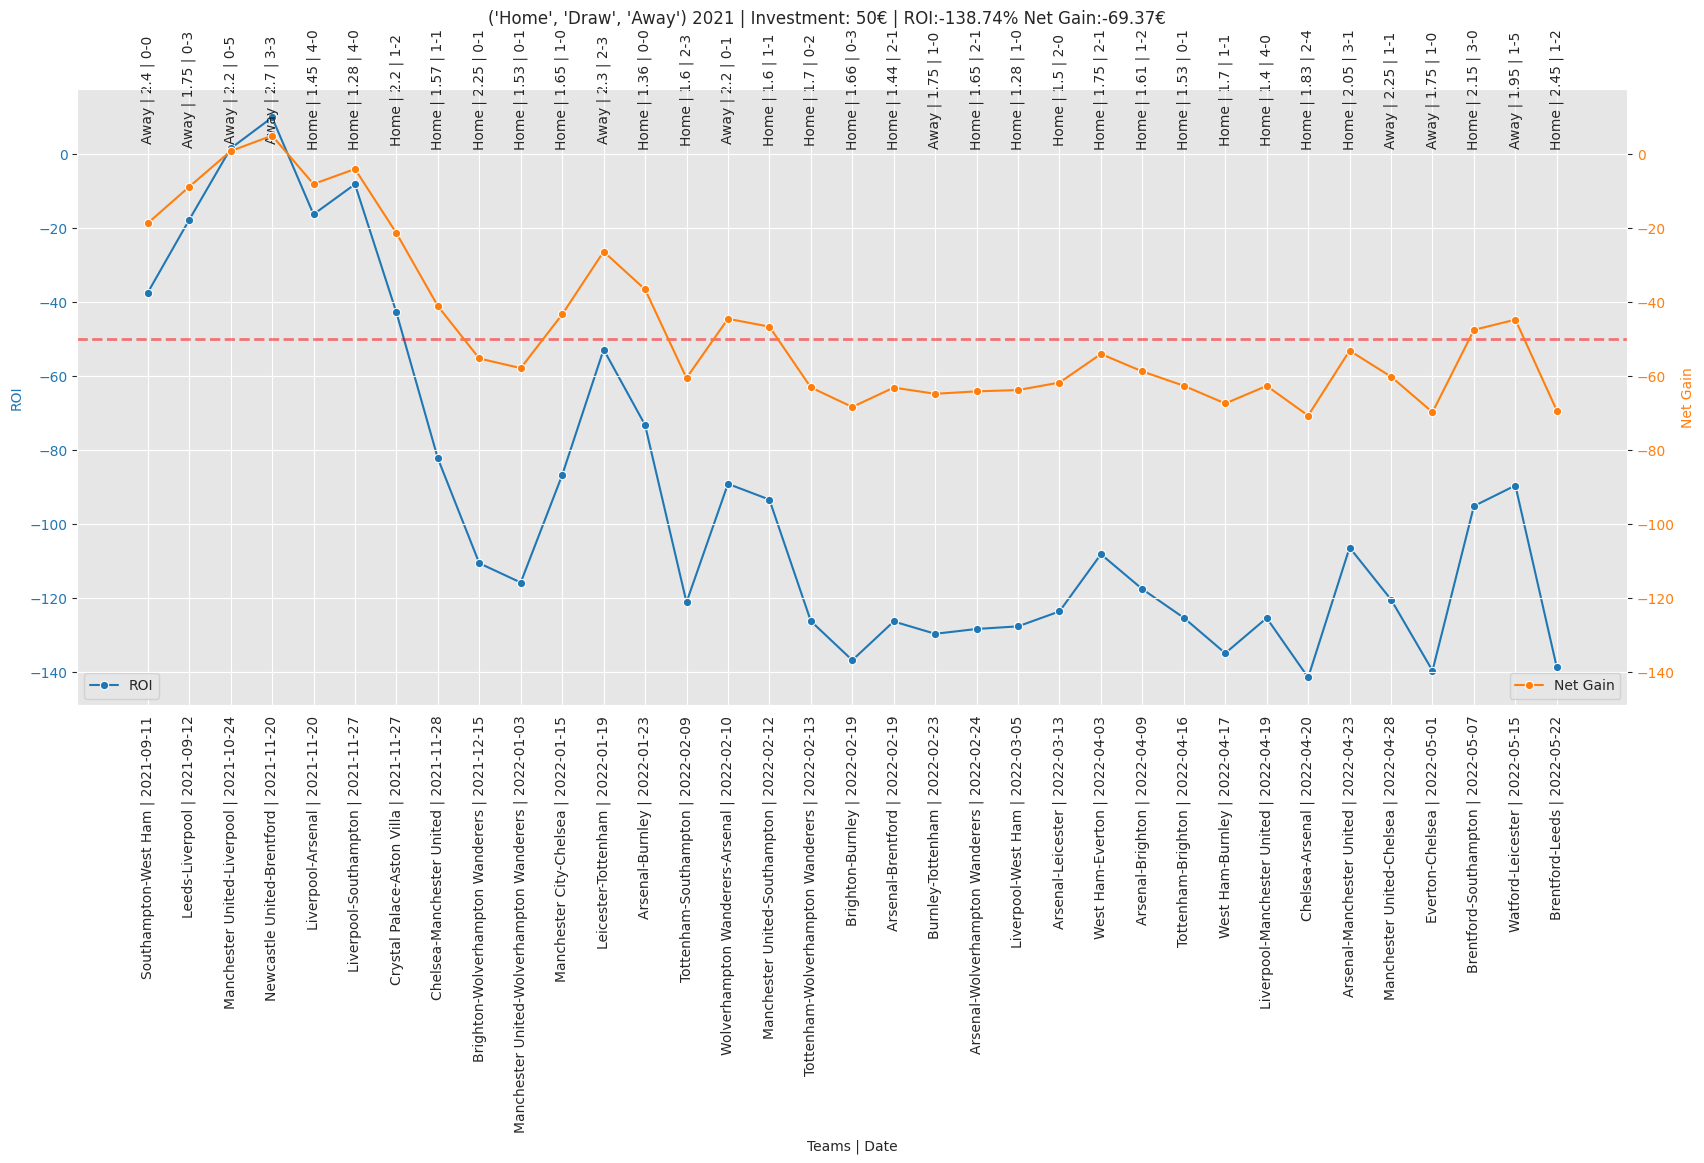

Date              HTeam              ATeam        Result  B365H  \
33  2022-08-27            Chelsea          Leicester  ['2 ', ' 1']    1.4   
32  2022-08-27           Brighton              Leeds  ['1 ', ' 0']    1.9   
31  2022-08-27          Brentford            Everton  ['1 ', ' 1']    2.0   
30  2022-08-27        Southampton  Manchester United  ['0 ', ' 1']    4.2   
39  2022-08-28  Nottingham Forest          Tottenham  ['0 ', ' 2']    7.0   
..         ...                ...                ...           ...    ...   
368 2023-05-24           Brighton    Manchester City  ['1 ', ' 1']    4.0   
369 2023-05-25  Manchester United            Chelsea  ['4 ', ' 1']    1.6   
373 2023-05-28            Chelsea   Newcastle United  ['1 ', ' 1']    2.9   
375 2023-05-28            Everton        Bournemouth  ['1 ', ' 0']    1.5   
372 2023-05-28          Brentford    Manchester City  ['1 ', ' 0']    3.8   

     B365D  B365A  BbAv>2.5  BbAv<2.5    Bet  
33    5.00   7.00      1.61      2.30  Under  
32    3.80   3.80      1.88      2.02  Under  
31    3.50   3.75      2.06      1.84  Under  
30    4.00   1.80      1.57      2.37  Under  
39    4.60   1.44      1.72      2.10  Under  
..     ...    ...       ...       ...    ...  
368   4.33   1.75      1.53      2.50   Over  
369   4.33   5.00      1.57      2.38   Over  
373   3.50   2.38      1.73      2.10   Over  
375   4.50   6.50      1.67      2.20   Over  
372   4.00   1.83      1.62      2.30  Under  

[190 rows x 10 columns]

[32.34571828398657, 44.113291458347334, 51.37468472168635, 34.197522065084, 35.60714641521815, 49.8854733175698, 47.836183007325246, 41.819686907787485, 55.36115686356101, 63.88013757049783, 80.63458163378249, 74.30923443846453, 59.26281482770733, 32.643518545397626, 26.723462785626538, 16.37313043336941, 17.495781016741773, 16.347105239709975, 0.7198154586140788, -14.656738826484544, -10.973259959928441, -0.09524798560320846, 11.858922604639247, 16.952813079196943, 6.71220484189, 4.456917777300859, 16.744505397030665, 8.711961898320283, -17.869618196786035, -14.23856589711349, -22.365913726149714, -26.627931500089062, -23.82362163079202, -34.0128775819057, -27.990814395902188, -42.13317566343439, -43.30688374775825, -67.30079730422314, -78.22723595057033, -69.35217752334412, -54.38013679916346, -52.94247936057778, -60.329230754476114, -30.982099280294847, -27.31595751137681, -9.800572790457224, -5.3114671587698865, -9.591519264910758, 0.4362944555047079, 10.104987122313304, -2.7709885

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




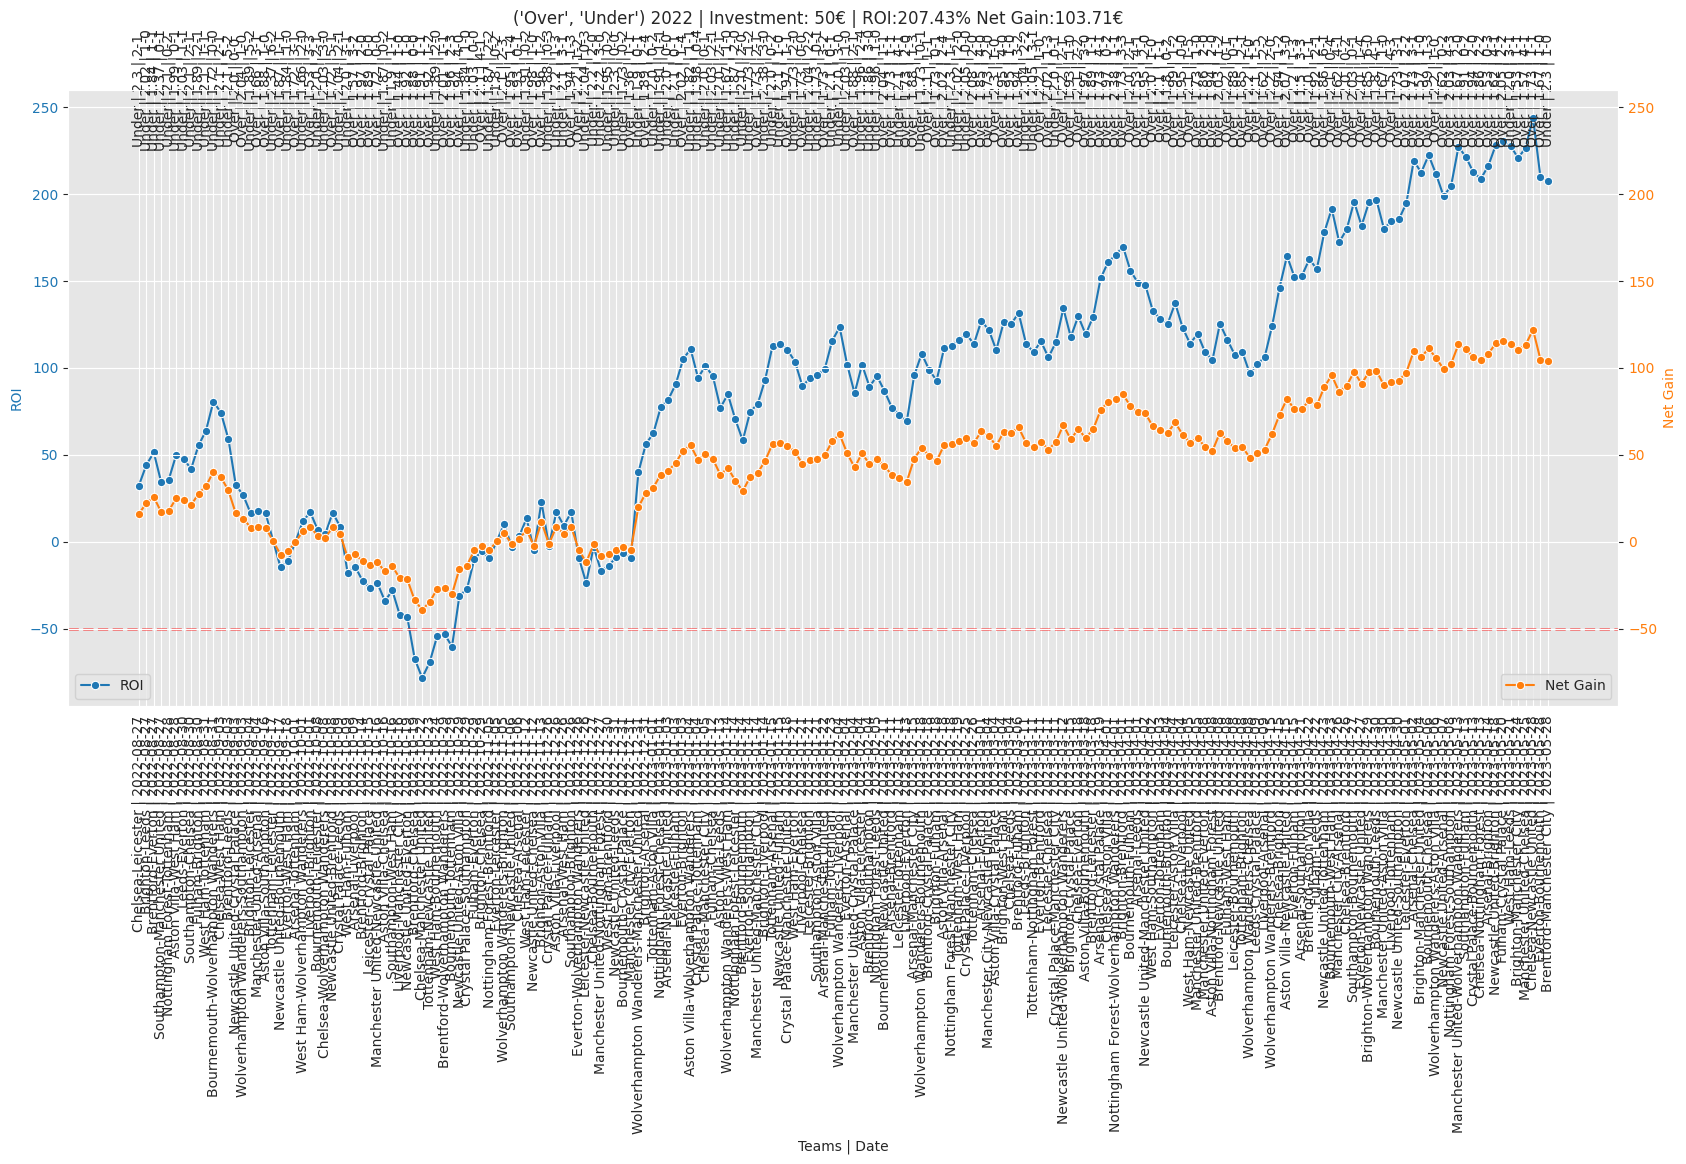

Date              HTeam                    ATeam        Result  \
41  2022-08-30             Fulham                 Brighton  ['2 ', ' 1']   
45  2022-08-31        Bournemouth  Wolverhampton Wanderers  ['0 ', ' 0']   
47  2022-08-31           West Ham                Tottenham  ['1 ', ' 1']   
44  2022-08-31            Arsenal              Aston Villa  ['2 ', ' 1']   
48  2022-08-31          Liverpool         Newcastle United  ['2 ', ' 1']   
..         ...                ...                      ...           ...   
361 2023-05-20          Liverpool              Aston Villa  ['1 ', ' 1']   
369 2023-05-25  Manchester United                  Chelsea  ['4 ', ' 1']   
374 2023-05-28     Crystal Palace        Nottingham Forest  ['1 ', ' 1']   
378 2023-05-28  Manchester United                   Fulham  ['2 ', ' 1']   
372 2023-05-28          Brentford          Manchester City  ['1 ', ' 0']   

     B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
41    3.10   3.30   2.30      2.01      1.89  Away  
45    3.50   3.30   2.15      2.10      1.72  Away  
47    3.60   3.80   1.95      1.72      2.10  Away  
44    1.45   4.50   6.00      1.72      2.10  Home  
48    1.33   5.25   9.00      1.50      2.62  Home  
..     ...    ...    ...       ...       ...   ...  
361   1.45   5.00   6.25      1.53      2.50  Home  
369   1.60   4.33   5.00      1.57      2.38  Home  
374   1.67   4.00   5.00      1.67      2.20  Home  
378   1.50   4.33   6.00      1.50      2.63  Home  
372   3.80   4.00   1.83      1.62      2.30  Away  

[70 rows x 10 columns]

[-22.281730359337697, -14.922001689335048, -22.922814716314353, -26.620819584382247, -22.19385875121424, -33.780273162082835, -18.320533695319014, -44.043201807108204, -40.177105473862106, -54.26378263460376, -45.28090679015273, -35.463490587590314, -22.370354584534, -0.9724229639908089, 19.305739279357454, -0.44937485411874434, 56.35489911361881, 39.44822174829517, 18.19203364933486, 54.680344407351896, 70.47814611962181, 24.236701254812303, 143.06774733720763, 178.3937137912884, 176.56941163382808, 187.27847008945741, 187.96824954034025, 155.81639522502473, 187.6435815985352, 192.1177450877749, 171.4109736955307, 154.76161776411857, 119.76415732224535, 125.95555350563171, 139.12823828267975, 129.84781922073122, 120.26931543796985, 88.11034199976092, 48.375256716725374, 59.671908357258445, 70.0155583376112, 53.2019492534107, 25.95554632289661, 37.423751706510444, 21.87608840137983, 28.53006322872514, 73.35035371857236, 90.45075496102191, 51.930976077663445, 56.89951859225238, 43.09892

/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




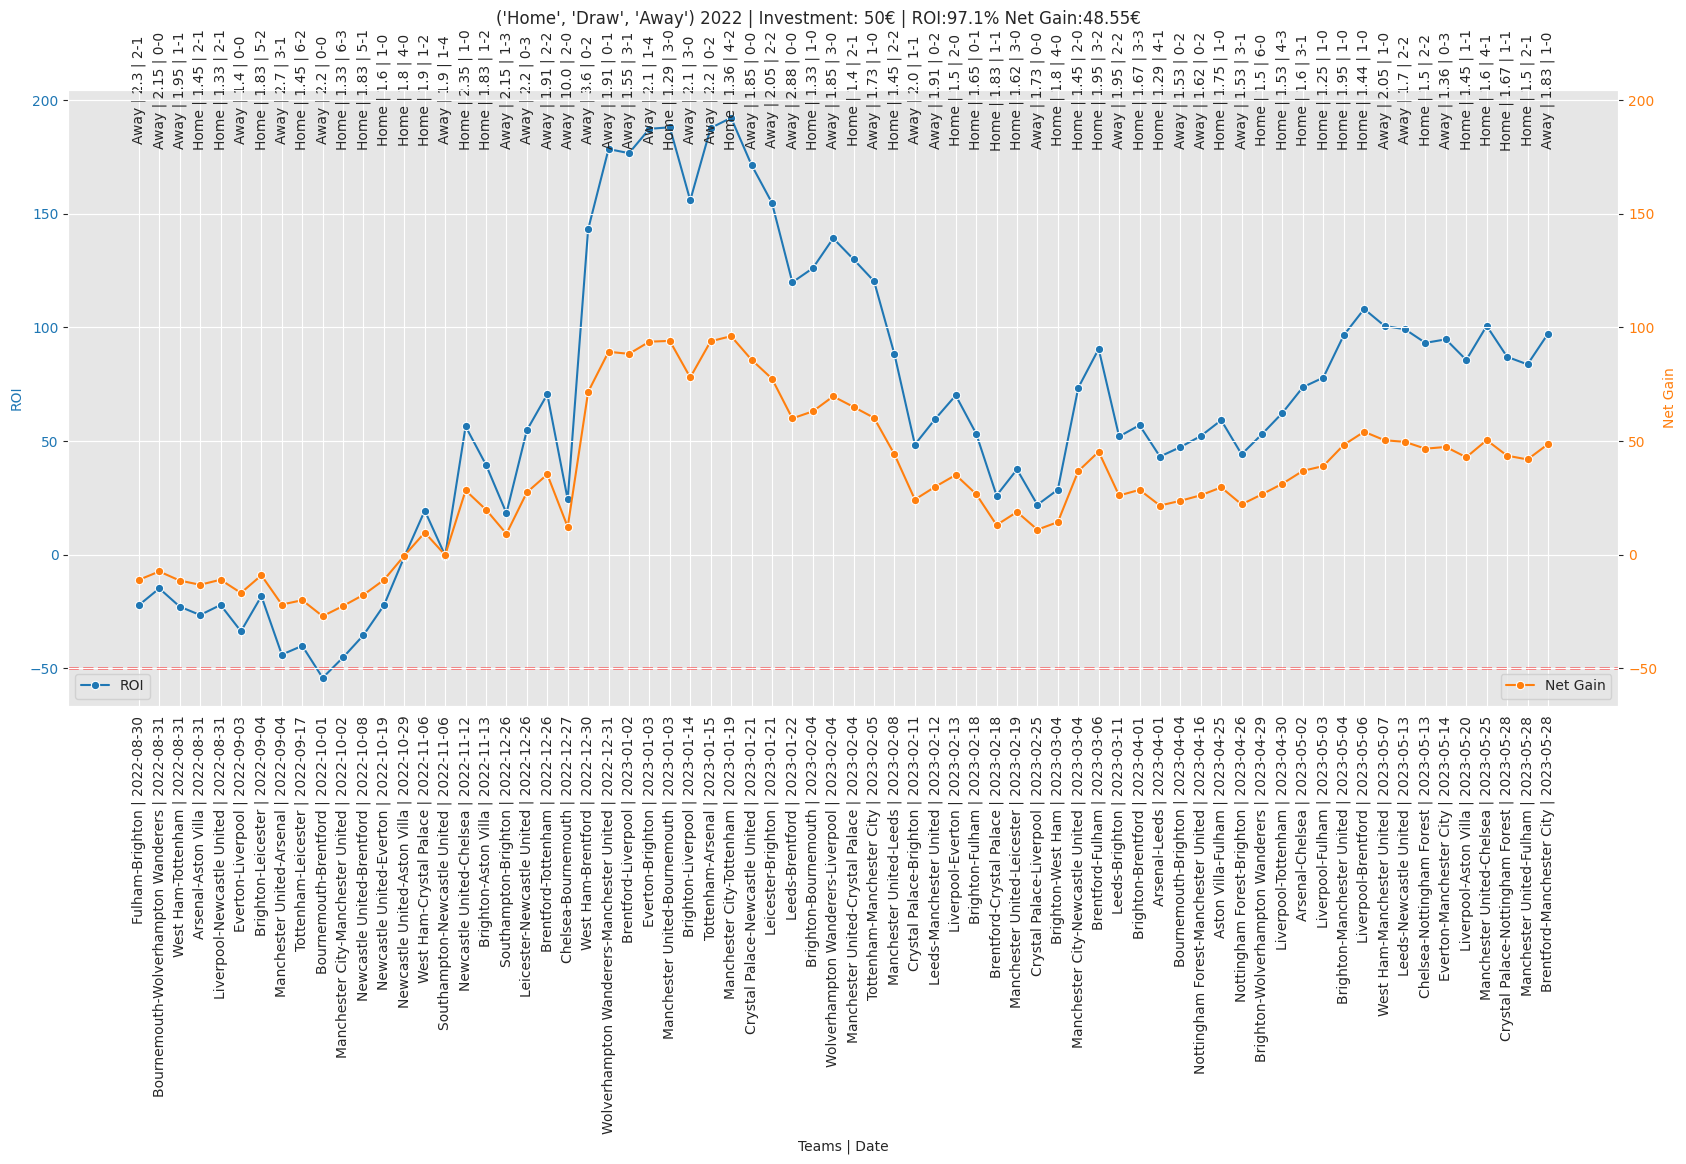

Date              HTeam                    ATeam        Result  \
31 2023-09-02          Brentford              Bournemouth  ['2 ', ' 2']   
36 2023-09-03     Crystal Palace  Wolverhampton Wanderers  ['3 ', ' 2']   
38 2023-09-03            Arsenal        Manchester United  ['3 ', ' 1']   
41 2023-09-16             Fulham                    Luton  ['1 ', ' 0']   
42 2023-09-16  Manchester United                 Brighton  ['1 ', ' 3']   
43 2023-09-16          Tottenham         Sheffield United  ['2 ', ' 1']   
46 2023-09-17        Bournemouth                  Chelsea  ['0 ', ' 0']   
48 2023-09-18  Nottingham Forest                  Burnley  ['1 ', ' 1']   
52 2023-09-23          Brentford                  Everton  ['1 ', ' 3']   
49 2023-09-23     Crystal Palace                   Fulham  ['0 ', ' 0']   
50 2023-09-23              Luton  Wolverhampton Wanderers  ['1 ', ' 1']   
54 2023-09-24            Arsenal                Tottenham  ['2 ', ' 2']   
56 2023-09-24            Chelsea              Aston Villa  ['0 ', ' 1']   
61 2023-09-30            Everton                    Luton  ['1 ', ' 2']   
62 2023-09-30  Manchester United           Crystal Palace  ['0 ', ' 1']   
67 2023-10-01  Nottingham Forest                Brentford  ['1 ', ' 1']   
68 2023-10-02             Fulham                  Chelsea  ['0 ', ' 2']   

    B365H  B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
31   1.73   3.80   4.75      1.73      2.10  Over  
36   1.91   3.30   4.33      2.20      1.67  Over  
38   1.75   3.80   4.50      1.57      2.38  Over  
41   1.67   3.75   5.50      1.89      2.01  Over  
42   2.15   4.00   2.88      1.44      2.75  Over  
43   1.29   5.50  11.00      1.50      2.63  Over  
46   4.33   3.75   1.80      1.67      2.20  Over  
48   2.20   3.50   3.25      1.92      1.98  Over  
52   1.80   3.80   4.20      1.95      1.95  Over  
49   1.91   3.40   4.20      2.00      1.80  Over  
50   3.25   3.40   2.20      2.02      1.88  Over  
54   1.67   4.33   4.33      1.50      2.63  Over  
56   1.91   3.75   3.80      1.73      2.10  Over  
61   1.57   3.80   6.50      2.05      1.85  Over  
62   1.55   4.20   5.75      1.80      2.00  Over  
67   2.75   3.10   2.70      2.10      1.73  Over  
68   3.60   3.50   2.05      1.98      1.92  Over

[25.037902976256447, 60.22576467289315, 76.10187224536338, 66.17937945058705, 73.48456533149923, 80.8113972944708, 56.46583596532108, 48.61788852134208, 28.39765419149262, -5.651580523053411, 18.36519933657445, 21.810665883200553, -11.955105702513023, 2.8942552043533567, -15.07492776056823, -24.64452851568197, -49.69756350352354]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




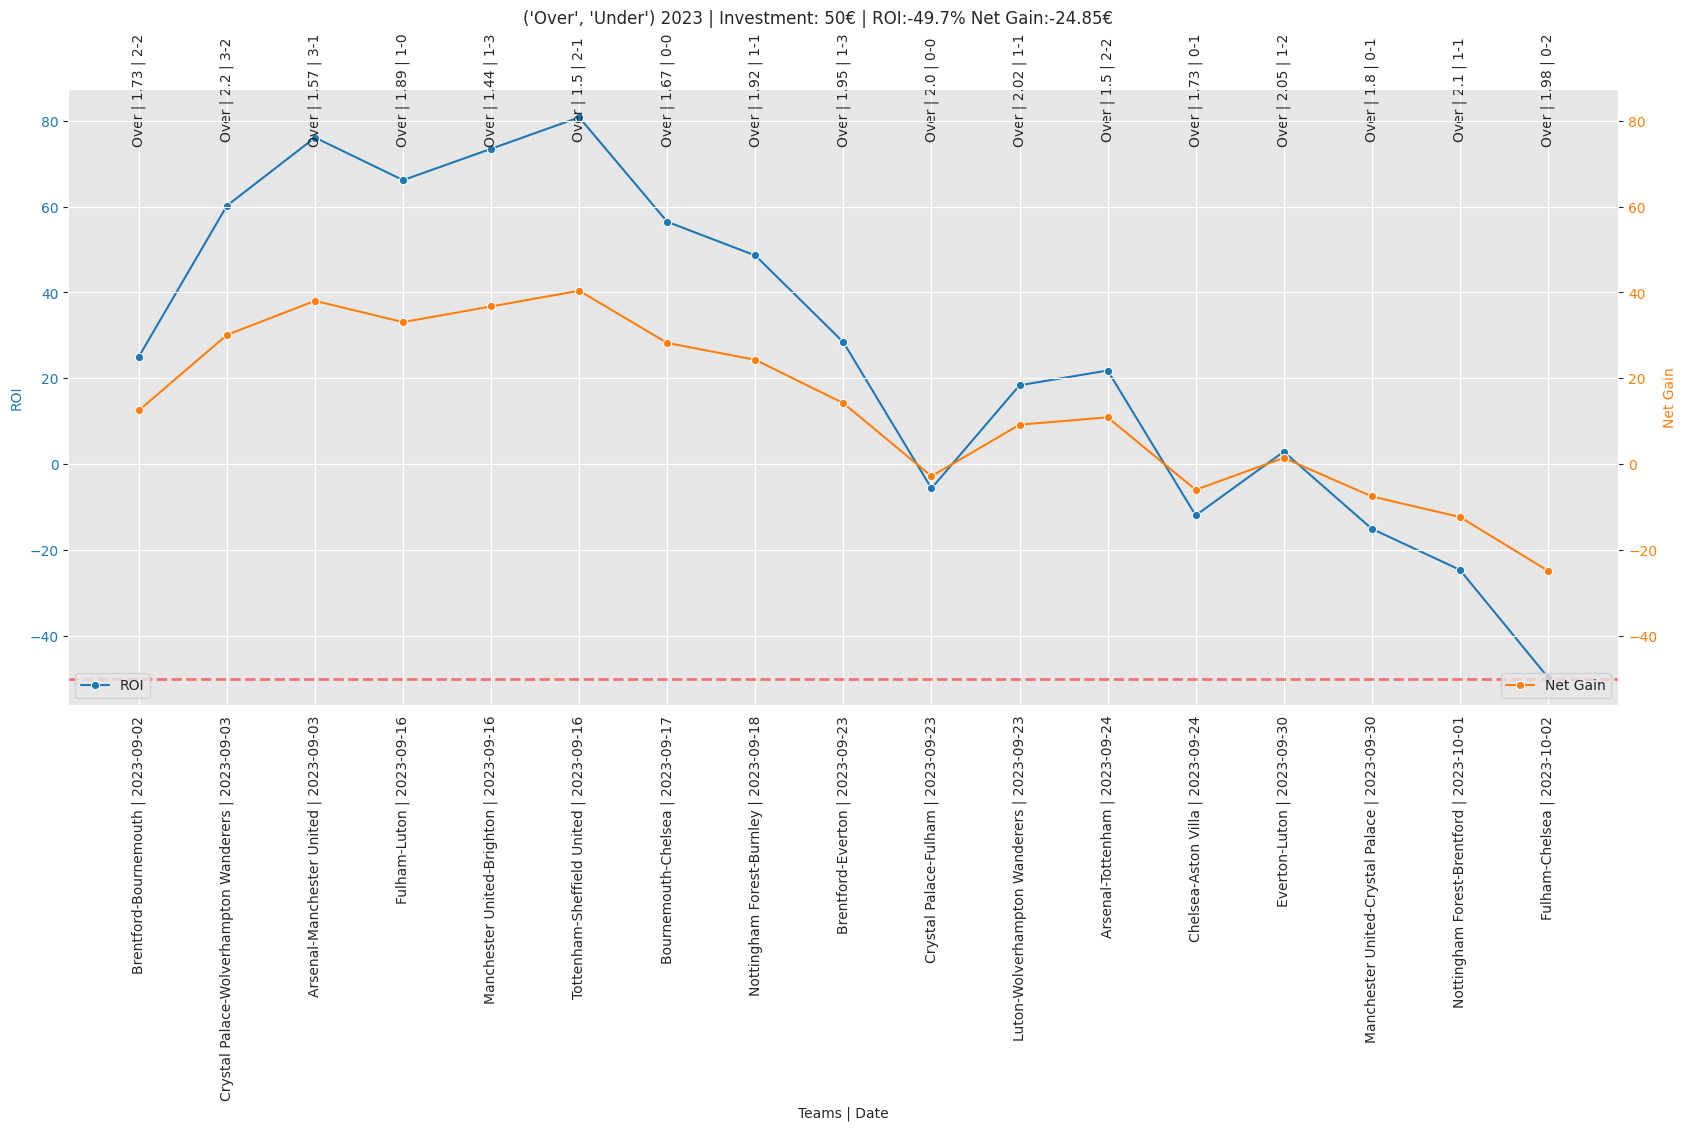

Date             HTeam              ATeam        Result  B365H  \
31 2023-09-02         Brentford        Bournemouth  ['2 ', ' 2']   1.73   
33 2023-09-02           Chelsea  Nottingham Forest  ['0 ', ' 1']   1.40   
35 2023-09-02          Brighton   Newcastle United  ['3 ', ' 1']   2.50   
30 2023-09-02  Sheffield United            Everton  ['2 ', ' 2']   2.90   
32 2023-09-02           Burnley          Tottenham  ['2 ', ' 5']   3.60   
43 2023-09-16         Tottenham   Sheffield United  ['2 ', ' 1']   1.29   
46 2023-09-17       Bournemouth            Chelsea  ['0 ', ' 0']   4.33   
52 2023-09-23         Brentford            Everton  ['1 ', ' 3']   1.80   
55 2023-09-24          Brighton        Bournemouth  ['3 ', ' 1']   1.36   
56 2023-09-24           Chelsea        Aston Villa  ['0 ', ' 1']   1.91   
68 2023-10-02            Fulham            Chelsea  ['0 ', ' 2']   3.60   

    B365D  B365A  BbAv>2.5  BbAv<2.5   Bet  
31   3.80   4.75      1.73      2.10  Home  
33   4.50   8.50      1.62      2.30  Home  
35   3.80   2.55      1.50      2.63  Home  
30   3.25   2.50      2.20      1.67  Away  
32   4.00   1.85      1.62      2.30  Away  
43   5.50  11.00      1.50      2.63  Home  
46   3.75   1.80      1.67      2.20  Away  
52   3.80   4.20      1.95      1.95  Home  
55   5.25   7.50      1.36      3.20  Home  
56   3.75   3.80      1.73      2.10  Home  
68   3.50   2.05      1.98      1.92  Away

[-27.798793154543446, -44.444580777322805, -26.514673376265947, -73.04495894816506, 4.755540791620064, 7.0655833063458715, -13.235969310821886, -26.06342181255316, -23.88016446571092, -52.82439135359725, -46.97791335115223]


/tmp/ipykernel_236889/1896866079.py:41: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_236889/1896866079.py:47: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




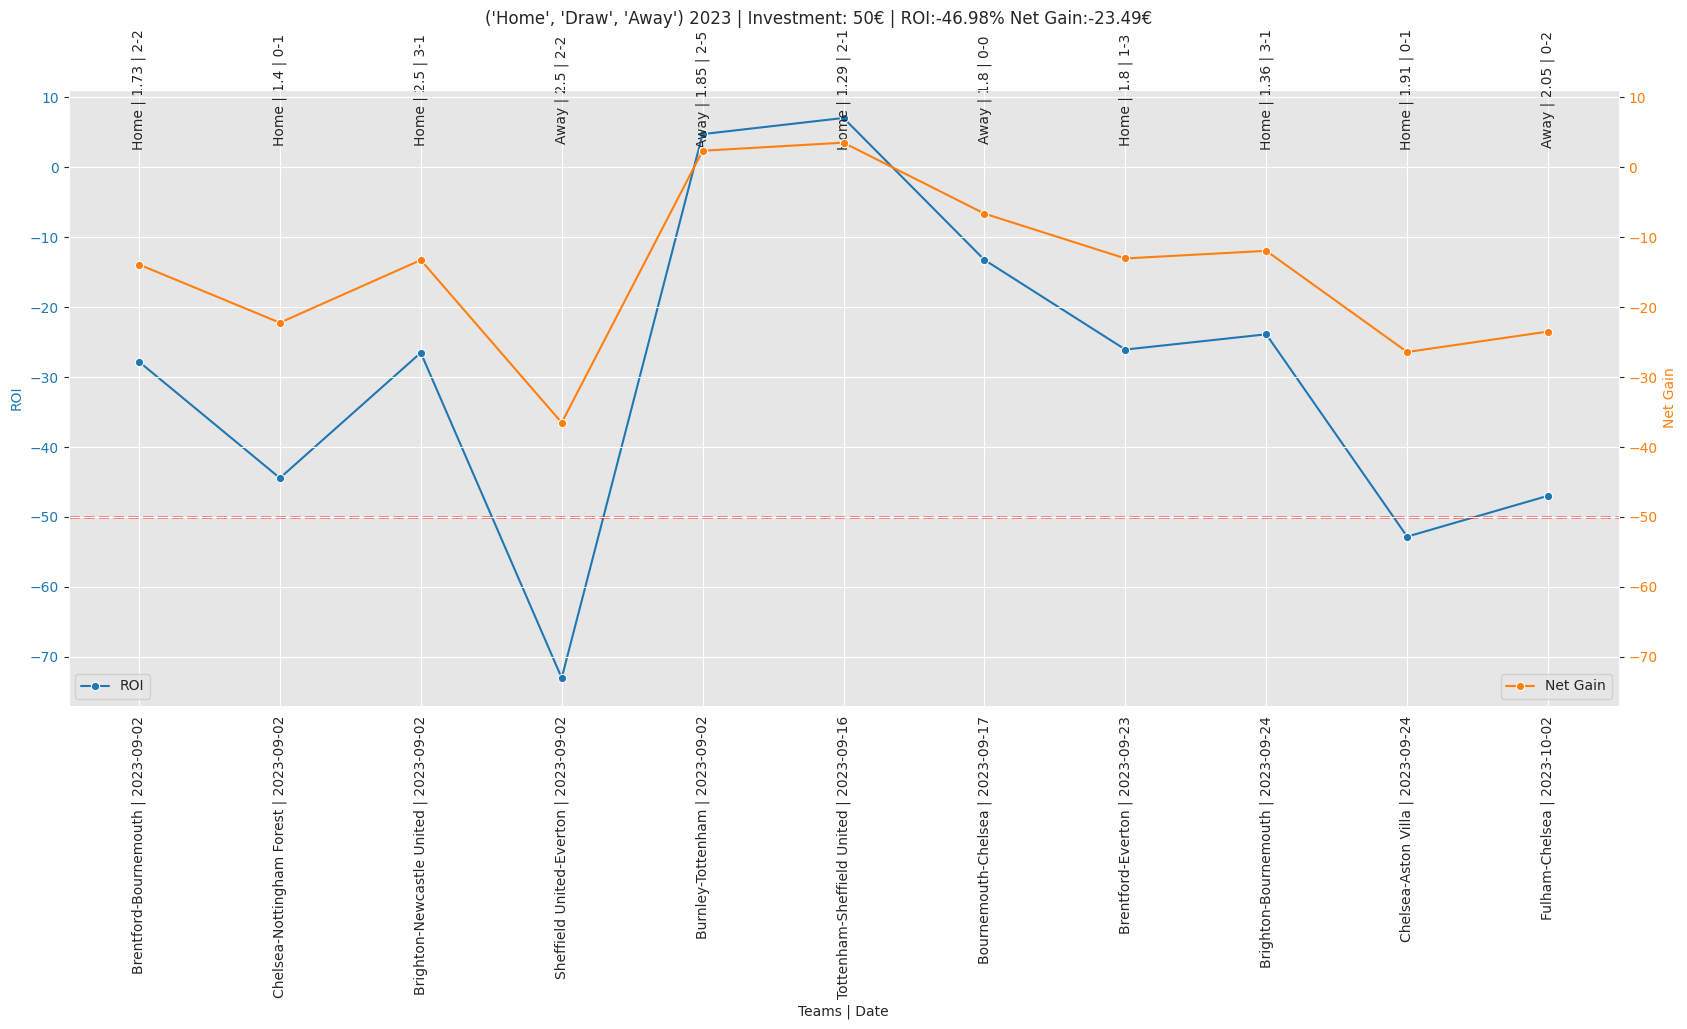

In [41]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
bet_types = [('Over', 'Under'), ('Home', 'Draw', 'Away')]
odds = [('BbAv>2.5', 'BbAv<2.5'), ('B365H', 'B365D', 'B365A')]

for i, year in enumerate(years):
    for j, y in enumerate([(Over_bet_list, Under_bet_list), (Home_bet_list, Draw_bet_list, Away_bet_list)]):
        # Create an empty list to store DataFrames
        concatenated_dfs = []    
        for l, x in enumerate(y):
            added = pd.DataFrame(x[i][7])
            added['Bet'] = str(bet_types[j][l])
            if concatenated_dfs:
                concatenated_dfs[-1] = pd.concat([concatenated_dfs[-1], added], axis=0)
            else:
                concatenated_dfs.append(added)
            
        
        df = pd.concat(concatenated_dfs, axis=0)
        df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
        df = df.sort_values(by="Date")
        display(df)
            
        if not df.empty:
            
            print(x[i][8])
            df['ROI'] = x[i][8]
            df['Net Gain'] = x[i][9]


            # Combine 'HTeam,' 'ATeam,' and 'Date' into a single column for x-axis labels
            df['CombinedLabel'] = df['HTeam'] + '-' + df['ATeam'] + ' | ' + df['Date'].astype(str)
            df.to_csv('Results/' +str(str(bet_types[j]) + ' ' + str(year)+'.csv'), index=False)

            # Create a single subplot
            fig, ax1 = plt.subplots(figsize=(20, 8))
            fig.suptitle(str(bet_types[j]) + ' ' + str(year) + ' | ' + 'Investment: ' + str(bank) + '€' + ' | ROI:' + str(round(df['ROI'].iloc[-1], 2)) + '%' + ' Net Gain:' + str(round(df['Net Gain'].iloc[-1], 2)) + '€')

            # Plot ROI on the first y-axis (ax1)
            ax1.set_xlabel('Teams | Date')
            ax1.set_ylabel('ROI', color='tab:blue')
            sns.lineplot(data=df, x='CombinedLabel', y='ROI', ax=ax1, color='tab:blue', marker='o', ci=None)
            ax1.tick_params(axis='y', labelcolor='tab:blue')

            # Create a second y-axis sharing the same x-axis
            ax2 = ax1.twinx()
            ax2.set_ylabel('Net Gain', color='tab:orange')
            sns.lineplot(data=df, x='CombinedLabel', y='Net Gain', ax=ax2, color='tab:orange', marker='o', ci=None)
            ax2.tick_params(axis='y', labelcolor='tab:orange')

            # Find the minimum and maximum values of both y-axes
            y1_min, y1_max = ax1.get_ylim()
            y2_min, y2_max = ax2.get_ylim()

            # Set the y-axis limits for both axes to have the same 0 point
            y_min = min(y1_min, y2_min, 0)
            y_max = max(y1_max, y2_max, 0)

            ax1.set_ylim(y_min, y_max)
            ax2.set_ylim(y_min, y_max)

            # Set the x-axis labels and rotate them
            x_labels = df['CombinedLabel'].tolist()
            x_labels_step = 1  # Adjust the step to control label spacing
            ax1.set_xticks(range(0, len(x_labels), x_labels_step))
            ax1.set_xticklabels(x_labels[::x_labels_step], rotation=90)

            # Add text labels at specific x-axis ticks
            x_ticks_to_label = [x_labels[i] for i in range(0, len(x_labels), x_labels_step)]  # Use x-axis labels directly
            for x_tick in x_ticks_to_label:
                k = x_labels.index(x_tick)  # Get the index of the x_tick label in the DataFrame
                if df['Bet'].iloc[k]=='Over':
                    odds_value = df['BbAv>2.5'].iloc[k]
                elif df['Bet'].iloc[k]=='Under':
                    odds_value = df['BbAv<2.5'].iloc[k]
                elif df['Bet'].iloc[k]=='Home':
                    odds_value = df['B365H'].iloc[k]
                elif df['Bet'].iloc[k]=='Draw':
                    odds_value = df['B365D'].iloc[k]
                elif df['Bet'].iloc[k]=='Away':
                    odds_value = df['B365A'].iloc[k]
                    
                result_value = df['Result'].iloc[k]

                label = f"{df['Bet'].iloc[k]} | {odds_value} | {list(result_value)[2]}-{list(result_value)[9]}"

                # Calculate the y-coordinate for the label
                # You can adjust the value (e.g., +0.02) to control the vertical placement
                y_coord = max(y_min, y_max) + 0.02

                # Add the label at the specified x and y coordinates
                ax1.text(x_tick, y_coord, label, rotation=90, ha='center', va='center')

            # Show the legend
            ax1.legend(['ROI'], loc='lower left')
            ax2.legend(['Net Gain'], loc='lower right')

            # Customize the line appearance
            ax1.axhline(y=-50, color='red', linestyle='--', label='Y = -50', linewidth=2, alpha=0.5)

            plt.show()


